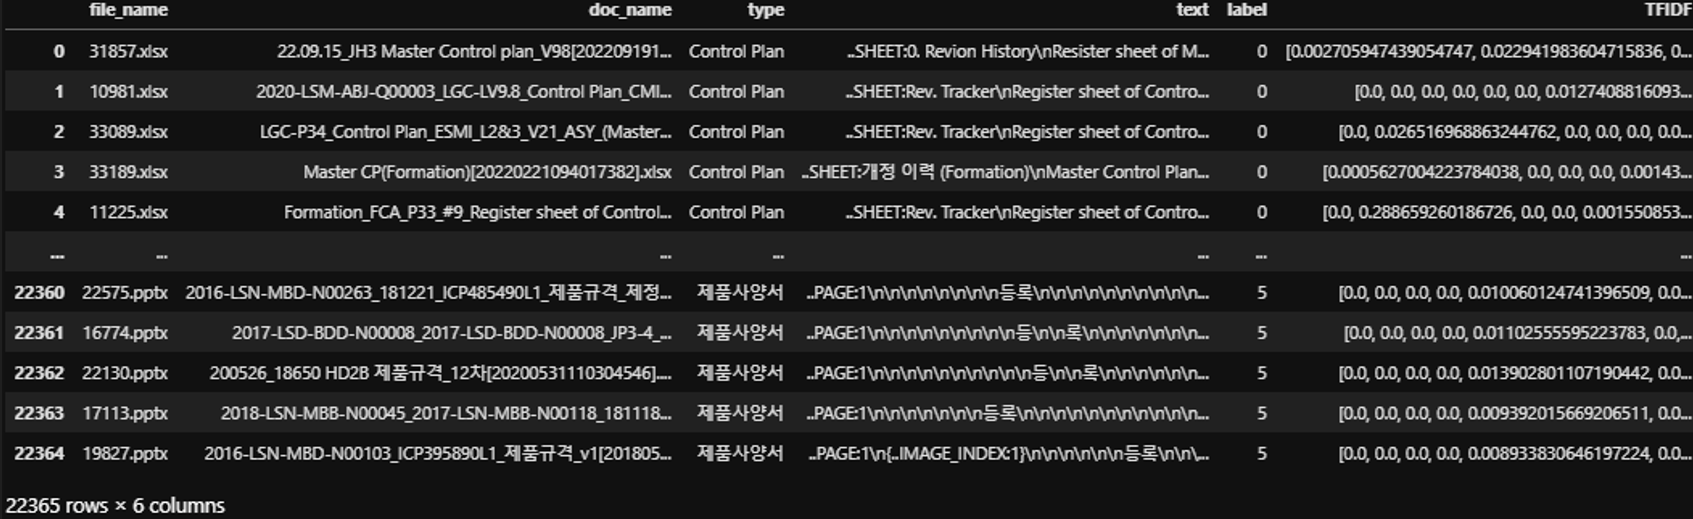

In [1]:
# 데이터 전처리

In [2]:
# 필요한 데이터 전처리하기 
import os
import numpy as np
import json
import pandas as pd
from collections import Counter

json_data=[]
out_lines = []
doc_one = []
doc_original = [] # 데이터 내용 
file_name = [] # 파일이름
doc_title = [] # per 주제

def listToString(str_list):
    result = ""
    for s in str_list:
        result += s + " "
    return result.strip()

with open('hwp_meta_data_ver2.json',encoding='UTF8') as f:
    json_load = json.load(f) # 전체데이터
    #print(json_load.keys()) : dict_keys(['20150116063329565.hwp', '20150325101504891.hwp', '20150325104304912.hwp',

    for k_filename,v_attributes in json_load.items():
        file_name.append(k_filename)
        doc_title.append(v_attributes['doc_title_of_research'])
        line = []                     # 파일 한 줄로 다  넣기
        for k,v in v_attributes.items():
            if isinstance(v, list): # 리스트일 경우
                for values in v:
                    if values is not None:
                        # vals = ' '.join(k.get(v))
                        line.append(values)
            else:
                if v is not None:  # 스트링일 경우
                    line.append(v)
                    

        doc_one = " ".join(line) # 원문데이터 묶어주기
        doc_original.append(doc_one)



In [3]:
doc_original[:5]

['저비용 목재 및 부산물 생산체계의 공정별 요소기술개발 Ⅰ. 가치있는 미래 산림자원 육성 Ⅰ-4. 효율적인 수확시스템 구축 목재수확시스템 반송기 벌채부산물 생산성 임업기계 timber harvesting system Carriage logging residue productivity forestry machines 목재 및 부산물 생산작업 생력화에 필요한 효과적인 목재수확계획 기법과 공정별 요소기술개발 (해당사항 없음) 라. 기대효과 및 활용계획 (1) 기술적 측면 (가) 효과적인 목질원료 생산체계 구축으로 생산성 향상 실현 (나) 용도별 목질원료 공급으로 원료확보 경쟁 완화 및 시장 안정화 (다) 목질원료 생산관련 임업기계장비의 활성화로 관련 업체의 산업화 (2) TRM 목표 달성도 (가) 집재장비의 성능개선으로 목재생산성 향상 및 비용절감 실현 (나) 벌채부산물의 효율적인 생산·공급 체계 구축 (1) 저비용 목재 및 부산물 생산체계의 공정별 요소기술 개발 (가) 집재작업 생산성 향상을 위한 반송기 개발 1) 공시재료(조사대상) : 반송기 2) 조사항목 및 방법 가) 문헌 고찰 및 현장방문을 통한 집재기 및 반송기의 유형 분류 나) 집재작업 생산성 향상을 위해 개발이 요구되는 반송기 개발계획 및 모델 구축 3) 시험규모(조사규모) : 반송기 1식 4) 분석항목 및 방법 가) 모델 Simulation 및 역학분석을 통한 개발 반송기의 적용 범위 및 제원 선정 나) 반송기 개발 및 시제품 제작 (나) 기반시설 위치별 효율적인 목재수확계획 기법 개발 1) 공시재료(조사대상) : 체인톱, 하베스터, 스윙야더, 반송기 2) 조사항목 및 방법 가) 문헌 고찰 및 현장방문을 통한 현행 목재수확계획 현황 및 문제점 파악 나) 목재수확계획 개발을 위한 대상지 선정 및 지형, 지리, 임상특성, 임도 등 현장 조사․분석 3) 시험규모(조사규모) : 목재수확계획 기법 1식 4) 분석항목 및 방법 가) 저비용 목재 및 부산물 생산을 위한 기반시설 위치별 목재수확계획 기법 개발 나

In [4]:
json_load.get('20150116063329565.hwp')

{'doc_title_of_research': '저비용 목재 및 부산물 생산체계의 공정별 요소기술개발',
 'trm_focusa_area': 'Ⅰ. 가치있는 미래 산림자원 육성',
 'trm_core_technology': 'Ⅰ-4. 효율적인 수확시스템 구축',
 'consignment_task_name': None,
 'service_task_name': None,
 'kor': ['목재수확시스템', '반송기', '벌채부산물', '생산성', '임업기계'],
 'eng': ['timber harvesting system',
  'Carriage',
  'logging residue',
  'productivity',
  'forestry',
  'machines'],
 'research_purpose': ['목재 및 부산물 생산작업 생력화에 필요한 효과적인 목재수확계획 기법과 공정별 요소기술개발'],
 'summary_of_research_project': ['(해당사항 없음)',
  '라. 기대효과 및 활용계획',
  '(1) 기술적 측면',
  '(가) 효과적인 목질원료 생산체계 구축으로 생산성 향상 실현',
  '(나) 용도별 목질원료 공급으로 원료확보 경쟁 완화 및 시장 안정화',
  '(다) 목질원료 생산관련 임업기계장비의 활성화로 관련 업체의 산업화',
  '(2) TRM 목표 달성도',
  '(가) 집재장비의 성능개선으로 목재생산성 향상 및 비용절감 실현',
  '(나) 벌채부산물의 효율적인 생산·공급 체계 구축'],
 'promotion_plan_for_the_current_year': ['(1) 저비용 목재 및 부산물 생산체계의 공정별 요소기술 개발',
  '(가) 집재작업 생산성 향상을 위한 반송기 개발',
  '1) 공시재료(조사대상) : 반송기',
  '2) 조사항목 및 방법',
  '가) 문헌 고찰 및 현장방문을 통한 집재기 및 반송기의 유형 분류',
  '나) 집재작업 생산성 향상을 위해 개발이 요구되는 반송기 개발계획 및 모델 구축'

In [5]:
json_load.keys()

dict_keys(['20150116063329565.hwp', '20150325101504891.hwp', '20150325104304912.hwp', '20150326045456367.hwp', '20150326051040311.hwp', '20150326060604094.hwp', '20150326095126547.hwp', '20150326111604520.hwp', '20150327022415436.hwp', '20150327034248922.hwp', '20150327035112118.hwp', '20150327035943105.hwp', '20150327043340959.hwp', '20150330092428562.hwp', '20150330102322848.hwp', '20150331031549914.hwp', '20150331043004883.hwp', '20150331055319671.hwp', '20150331060204966.hwp', '20150331083046146.hwp', '20150331084021832.hwp', '20150331084810661.hwp', '20150331085504994.hwp', '20150331090717401.hwp', '20150331091107341.hwp', '20150331093951375.hwp', '20150331094627772.hwp', '20150331095310340.hwp', '20150331095757417.hwp', '20150331100740522.hwp', '20150401012500822.hwp', '20150401093506686.hwp', '20150401113052592.hwp', '20150806050939369.hwp', '20150806054724328.hwp', '20150831014117661.hwp', '20150916110018372.hwp', '20150923023427209.hwp', '20160211084945758.hwp', '2016021601003

In [6]:
print(json_load.get('20150116063329565.hwp'))

{'doc_title_of_research': '저비용 목재 및 부산물 생산체계의 공정별 요소기술개발', 'trm_focusa_area': 'Ⅰ. 가치있는 미래 산림자원 육성', 'trm_core_technology': 'Ⅰ-4. 효율적인 수확시스템 구축', 'consignment_task_name': None, 'service_task_name': None, 'kor': ['목재수확시스템', '반송기', '벌채부산물', '생산성', '임업기계'], 'eng': ['timber harvesting system', 'Carriage', 'logging residue', 'productivity', 'forestry', 'machines'], 'research_purpose': ['목재 및 부산물 생산작업 생력화에 필요한 효과적인 목재수확계획 기법과 공정별 요소기술개발'], 'summary_of_research_project': ['(해당사항 없음)', '라. 기대효과 및 활용계획', '(1) 기술적 측면', '(가) 효과적인 목질원료 생산체계 구축으로 생산성 향상 실현', '(나) 용도별 목질원료 공급으로 원료확보 경쟁 완화 및 시장 안정화', '(다) 목질원료 생산관련 임업기계장비의 활성화로 관련 업체의 산업화', '(2) TRM 목표 달성도', '(가) 집재장비의 성능개선으로 목재생산성 향상 및 비용절감 실현', '(나) 벌채부산물의 효율적인 생산·공급 체계 구축'], 'promotion_plan_for_the_current_year': ['(1) 저비용 목재 및 부산물 생산체계의 공정별 요소기술 개발', '(가) 집재작업 생산성 향상을 위한 반송기 개발', '1) 공시재료(조사대상) : 반송기', '2) 조사항목 및 방법', '가) 문헌 고찰 및 현장방문을 통한 집재기 및 반송기의 유형 분류', '나) 집재작업 생산성 향상을 위해 개발이 요구되는 반송기 개발계획 및 모델 구축', '3) 시험규모(조사규모) : 반송기 1식', '4) 분석항목 및 방법', '

In [7]:
doc_table= pd.concat([pd.DataFrame(file_name),pd.DataFrame(doc_title),pd.DataFrame(doc_original)], axis = 1)
doc_table.columns = ['file_name','doc_title', 'doc_original'] #
doc_table

,file_name,doc_title,doc_original
0,20150116063329565.hwp,저비용 목재 및 부산물 생산체계의 공정별 요소기술개발,저비용 목재 및 부산물 생산체계의 공정별 요소기술개발 Ⅰ. 가치있는 미래 산림자원 ...
1,20150325101504891.hwp,산림단기소득원을 활용한 산림소득단지 조성 기술 및 관리시스템 개발,산림단기소득원을 활용한 산림소득단지 조성 기술 및 관리시스템 개발 Ⅰ. 가치있는 미...
2,20150325104304912.hwp,송이 시험지 모니터링 및 송이 실현 재배,송이 시험지 모니터링 및 송이 실현 재배 Ⅰ. 가치있는 미래 산림자원 육성 Ⅰ-5....
3,20150326045456367.hwp,주요 경제수종의 천연갱신기법 및 수확작업에 관한 연구,주요 경제수종의 천연갱신기법 및 수확작업에 관한 연구 Ⅰ. 가치있는 미래 산림자원 ...
4,20150326051040311.hwp,주요 활엽수종 고품질 묘목 생산을 위한 양묘기술 개발,주요 활엽수종 고품질 묘목 생산을 위한 양묘기술 개발 Ⅰ. 가치있는 미래 산림자원 ...
...,...,...,...
330,20230227013132538414.hwp,REDD+를 활용한 국외 탄소흡수원 확충 방안 연구,REDD+를 활용한 국외 탄소흡수원 확충 방안 연구 Ⅴ. 신기후체제 대응 및 국제·...
331,20230227091523722097.hwp,국산 목재의 환경가치를 반영한 전과정 물질흐름분석 모델 개발,국산 목재의 환경가치를 반영한 전과정 물질흐름분석 모델 개발 Ⅶ. 최적 가공기술을 ...
332,20230227113654012793.hwp,유용 산림바이오자원을 활용한 기능성 홈케어 모발건강 생활소재 개발,유용 산림바이오자원을 활용한 기능성 홈케어 모발건강 생활소재 개발 Ⅵ. 산림생명자원...
333,20230228012241796767.hwp,복령을 이용한 골 대사 개선 효과 탐색,복령을 이용한 골 대사 개선 효과 탐색 Ⅵ. 산림생명자원을 이용한 임업소득 증대 및...


불용어 제거하기

In [8]:
len(doc_original)

335

In [9]:
import re
line = doc_original.copy()
# 한글과 띄어쓰기, 영어를 제외한 모든 글자
compile = re.compile("[^ \+|a-z|A-Z|ㄱ-ㅣ가-힣]+")
for i in range(len(line)):

    a = compile.sub("",line[i])
    line[i] = a
print(line[0])


저비용 목재 및 부산물 생산체계의 공정별 요소기술개발  가치있는 미래 산림자원 육성  효율적인 수확시스템 구축 목재수확시스템 반송기 벌채부산물 생산성 임업기계 timber harvesting system Carriage logging residue productivity forestry machines 목재 및 부산물 생산작업 생력화에 필요한 효과적인 목재수확계획 기법과 공정별 요소기술개발 해당사항 없음 라 기대효과 및 활용계획  기술적 측면 가 효과적인 목질원료 생산체계 구축으로 생산성 향상 실현 나 용도별 목질원료 공급으로 원료확보 경쟁 완화 및 시장 안정화 다 목질원료 생산관련 임업기계장비의 활성화로 관련 업체의 산업화  TRM 목표 달성도 가 집재장비의 성능개선으로 목재생산성 향상 및 비용절감 실현 나 벌채부산물의 효율적인 생산공급 체계 구축  저비용 목재 및 부산물 생산체계의 공정별 요소기술 개발 가 집재작업 생산성 향상을 위한 반송기 개발  공시재료조사대상  반송기  조사항목 및 방법 가 문헌 고찰 및 현장방문을 통한 집재기 및 반송기의 유형 분류 나 집재작업 생산성 향상을 위해 개발이 요구되는 반송기 개발계획 및 모델 구축  시험규모조사규모  반송기 식  분석항목 및 방법 가 모델 Simulation 및 역학분석을 통한 개발 반송기의 적용 범위 및 제원 선정 나 반송기 개발 및 시제품 제작 나 기반시설 위치별 효율적인 목재수확계획 기법 개발  공시재료조사대상  체인톱 하베스터 스윙야더 반송기  조사항목 및 방법 가 문헌 고찰 및 현장방문을 통한 현행 목재수확계획 현황 및 문제점 파악 나 목재수확계획 개발을 위한 대상지 선정 및 지형 지리 임상특성 임도 등 현장 조사분석  시험규모조사규모  목재수확계획 기법 식  분석항목 및 방법 가 저비용 목재 및 부산물 생산을 위한 기반시설 위치별 목재수확계획 기법 개발 나 개발된 목재수확계획 기법의 현장 적용 및 타당성 검토


In [10]:
in_person_stopwords = '지역 품목 항목 기대효과 활용계획 조사 기술적측면 기여도 공시재료 TRM 목표 달성도 조사지역 시험규모 조사항목 입지환경 조성관리 공시재료 조사대상 조사내용 조사규모 처리방법 분석항목 및 방법 선정 설계 한국어 개발 기술 목재 등 위한'

# stop_words = in_person_stopwords
stop_words = in_person_stopwords
stop_words = stop_words.split(' ')
print(stop_words)

['지역', '품목', '항목', '기대효과', '활용계획', '조사', '기술적측면', '기여도', '공시재료', 'TRM', '목표', '달성도', '조사지역', '시험규모', '조사항목', '입지환경', '조성관리', '공시재료', '조사대상', '조사내용', '조사규모', '처리방법', '분석항목', '및', '방법', '선정', '설계', '한국어', '개발', '기술', '목재', '등', '위한']


In [11]:
def remove_stopwords_from_list(content_list, stopwords):
    """Remove stopwords"""
    filtered_list = []

    for sentence in content_list:
        filtered_sentence = " ".join([word for word in sentence.split() if word not in stopwords])
        filtered_list.append(filtered_sentence)
        
    return filtered_list

In [12]:
filtered_sample = remove_stopwords_from_list(line, stop_words)

In [13]:
filtered_sample[:5]

['저비용 부산물 생산체계의 공정별 요소기술개발 가치있는 미래 산림자원 육성 효율적인 수확시스템 구축 목재수확시스템 반송기 벌채부산물 생산성 임업기계 timber harvesting system Carriage logging residue productivity forestry machines 부산물 생산작업 생력화에 필요한 효과적인 목재수확계획 기법과 공정별 요소기술개발 해당사항 없음 라 기술적 측면 가 효과적인 목질원료 생산체계 구축으로 생산성 향상 실현 나 용도별 목질원료 공급으로 원료확보 경쟁 완화 시장 안정화 다 목질원료 생산관련 임업기계장비의 활성화로 관련 업체의 산업화 가 집재장비의 성능개선으로 목재생산성 향상 비용절감 실현 나 벌채부산물의 효율적인 생산공급 체계 구축 저비용 부산물 생산체계의 공정별 요소기술 가 집재작업 생산성 향상을 반송기 공시재료조사대상 반송기 가 문헌 고찰 현장방문을 통한 집재기 반송기의 유형 분류 나 집재작업 생산성 향상을 위해 개발이 요구되는 반송기 개발계획 모델 구축 시험규모조사규모 반송기 식 가 모델 Simulation 역학분석을 통한 반송기의 적용 범위 제원 나 반송기 시제품 제작 나 기반시설 위치별 효율적인 목재수확계획 기법 공시재료조사대상 체인톱 하베스터 스윙야더 반송기 가 문헌 고찰 현장방문을 통한 현행 목재수확계획 현황 문제점 파악 나 목재수확계획 개발을 대상지 지형 지리 임상특성 임도 현장 조사분석 시험규모조사규모 목재수확계획 기법 식 가 저비용 부산물 생산을 기반시설 위치별 목재수확계획 기법 나 개발된 목재수확계획 기법의 현장 적용 타당성 검토',
 '산림단기소득원을 활용한 산림소득단지 조성 관리시스템 가치있는 미래 산림자원 육성 단기 임산 소득자원의 신품종 발굴 육성 산림복합경영 단기소득원 산림 임간재배 산채 Agroforestry Shortterm income source Forest Forest farming Wild vegetable 산림단기소득원 품목별 연구성과를 토대로 현장실연 연구를 통해 지속

In [14]:
print(len(filtered_sample))

335


In [15]:
final_sample = pd.concat([pd.DataFrame(filtered_sample)], axis = 1)
final_sample.columns = ['filtered_sample'] #
final_sample

,filtered_sample
0,저비용 부산물 생산체계의 공정별 요소기술개발 가치있는 미래 산림자원 육성 효율적인 ...
1,산림단기소득원을 활용한 산림소득단지 조성 관리시스템 가치있는 미래 산림자원 육성 단...
2,송이 시험지 모니터링 송이 실현 재배 가치있는 미래 산림자원 육성 단기 임산 소득자...
3,주요 경제수종의 천연갱신기법 수확작업에 관한 연구 가치있는 미래 산림자원 육성 고부...
4,주요 활엽수종 고품질 묘목 생산을 양묘기술 가치있는 미래 산림자원 육성 고부가가치 ...
...,...
330,REDD+를 활용한 국외 탄소흡수원 확충 방안 연구 신기후체제 대응 국제북한 산림협...
331,국산 목재의 환경가치를 반영한 전과정 물질흐름분석 모델 최적 가공기술을 활용한 목재...
332,유용 산림바이오자원을 활용한 기능성 홈케어 모발건강 생활소재 산림생명자원을 이용한 ...
333,복령을 이용한 골 대사 개선 효과 탐색 산림생명자원을 이용한 임업소득 증대 산업화 ...


In [16]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
kiwi.analyze(filtered_sample[0])

[([Token(form='저', tag='XPN', start=0, len=1),
   Token(form='비용', tag='NNG', start=1, len=2),
   Token(form='부산물', tag='NNG', start=4, len=3),
   Token(form='생산', tag='NNG', start=8, len=2),
   Token(form='체계', tag='NNG', start=10, len=2),
   Token(form='의', tag='JKG', start=12, len=1),
   Token(form='공정', tag='NNG', start=14, len=2),
   Token(form='별', tag='XSN', start=16, len=1),
   Token(form='요소', tag='NNG', start=18, len=2),
   Token(form='기술', tag='NNG', start=20, len=2),
   Token(form='개발', tag='NNG', start=22, len=2),
   Token(form='가치', tag='NNG', start=25, len=2),
   Token(form='있', tag='VA', start=27, len=1),
   Token(form='는', tag='ETM', start=28, len=1),
   Token(form='미래', tag='NNG', start=30, len=2),
   Token(form='산림', tag='NNG', start=33, len=2),
   Token(form='자원', tag='NNG', start=35, len=2),
   Token(form='육성', tag='NNG', start=38, len=2),
   Token(form='효율', tag='NNG', start=41, len=2),
   Token(form='적', tag='XSN', start=43, len=1),
   Token(form='이', tag='VCP', 

In [17]:
# 명사 추출 함수
def noun_extractor(text):
    results = []
    result = kiwi.analyze(text)
    for token, pos, _, _ in result[0][0]:
        if len(token) != 1 and pos.startswith('N') or pos.startswith('SL'):
            results.append(token)
    return results

In [18]:
# nouns = noun_extractor(filtered_sample[0])
# nouns
doc_nouns = []

for kiwi_input in filtered_sample:
    nouns = noun_extractor(kiwi_input)
    text = ' '.join(nouns)
    doc_nouns.append(text)

In [19]:
filtered_sample[0]

'저비용 부산물 생산체계의 공정별 요소기술개발 가치있는 미래 산림자원 육성 효율적인 수확시스템 구축 목재수확시스템 반송기 벌채부산물 생산성 임업기계 timber harvesting system Carriage logging residue productivity forestry machines 부산물 생산작업 생력화에 필요한 효과적인 목재수확계획 기법과 공정별 요소기술개발 해당사항 없음 라 기술적 측면 가 효과적인 목질원료 생산체계 구축으로 생산성 향상 실현 나 용도별 목질원료 공급으로 원료확보 경쟁 완화 시장 안정화 다 목질원료 생산관련 임업기계장비의 활성화로 관련 업체의 산업화 가 집재장비의 성능개선으로 목재생산성 향상 비용절감 실현 나 벌채부산물의 효율적인 생산공급 체계 구축 저비용 부산물 생산체계의 공정별 요소기술 가 집재작업 생산성 향상을 반송기 공시재료조사대상 반송기 가 문헌 고찰 현장방문을 통한 집재기 반송기의 유형 분류 나 집재작업 생산성 향상을 위해 개발이 요구되는 반송기 개발계획 모델 구축 시험규모조사규모 반송기 식 가 모델 Simulation 역학분석을 통한 반송기의 적용 범위 제원 나 반송기 시제품 제작 나 기반시설 위치별 효율적인 목재수확계획 기법 공시재료조사대상 체인톱 하베스터 스윙야더 반송기 가 문헌 고찰 현장방문을 통한 현행 목재수확계획 현황 문제점 파악 나 목재수확계획 개발을 대상지 지형 지리 임상특성 임도 현장 조사분석 시험규모조사규모 목재수확계획 기법 식 가 저비용 부산물 생산을 기반시설 위치별 목재수확계획 기법 나 개발된 목재수확계획 기법의 현장 적용 타당성 검토'

In [20]:
doc_nouns[0]

'비용 부산물 생산 체계 공정 요소 기술 개발 가치 미래 산림 자원 육성 효율 수확 시스템 구축 목재 수확 시스템 송기 벌채 부산물 생산 임업 기계 timber harvesting system Carriage logging residue productivity forestry machines 부산물 생산 작업 필요 효과 목재 수확 계획 기법 공정 요소 기술 개발 해당 사항 기술 측면 효과 원료 생산 체계 구축 생산 향상 실현 용도 원료 공급 원료 확보 경쟁 완화 시장 안정 원료 생산 관련 임업 기계 장비 활성 관련 업체 산업 장비 성능 개선 목재 생산 향상 비용 절감 실현 벌채 부산물 효율 생산 공급 체계 구축 비용 부산물 생산 체계 공정 요소 기술 작업 생산 향상 반송 공시 재료 조사 대상 반송 문헌 고찰 현장 방문 재기 송기 유형 분류 작업 생산 향상 개발 요구 송기 개발 계획 모델 구축 시험 규모 조사 규모 송기 모델 Simulation 역학 분석 송기 적용 범위 제원 반송 시제품 제작 기반 시설 위치 효율 목재 수확 계획 기법 공시 재료 조사 대상 체인 하베스터 스윙 반송 문헌 고찰 현장 방문 현행 목재 수확 계획 현황 문제점 파악 목재 수확 계획 개발 대상지 지형 지리 임상 특성 임도 현장 조사 분석 시험 규모 조사 규모 목재 수확 계획 기법 비용 부산물 생산 기반 시설 위치 목재 수확 계획 기법 개발 목재 수확 계획 기법 현장 적용 타당성 검토'

In [21]:
nouns_processing = pd.concat([pd.DataFrame(doc_nouns)], axis = 1)
nouns_processing.columns = ['doc_nouns'] #
nouns_processing

,doc_nouns
0,비용 부산물 생산 체계 공정 요소 기술 개발 가치 미래 산림 자원 육성 효율 수확 ...
1,산림 단기 소득원 활용 산림 소득 단지 조성 관리 시스템 가치 미래 산림 자원 육성...
2,송이 시험지 모니터링 송이 실현 재배 가치 미래 산림 자원 육성 단기 임산 소득 자...
3,주요 경제 수종 천연 갱신 기법 수확 작업 연구 가치 미래 산림 자원 육성 부가 가...
4,주요 활엽수 품질 묘목 생산 기술 가치 미래 산림 자원 육성 부가 가치 산림 자원 ...
...,...
330,REDD 활용 국외 탄소 흡수 확충 방안 연구 기후 체제 대응 국제 산림 협력 강화...
331,국산 목재 환경 가치 반영 과정 물질 흐름 분석 모델 최적 가공 기술 활용 목재 이...
332,유용 산림 바이오 자원 활용 기능 홈케어 모발 건강 생활 소재 산림 생명 자원 이용...
333,복령 이용 대사 개선 효과 탐색 산림 생명 자원 이용 임업 소득 증대 산업 활용 산...


In [22]:
# merge_table = pd.concat([doc_table, nouns_processing], axis = 1 )
# merge_table

In [23]:
nouns_processing.to_csv('json_to_text(noun).txt',header=False, index=False, sep="\n") # sep활용하여 tab 구분 정의 

In [24]:
# 구현하기

In [25]:
text_file = "./json_to_text(noun).txt"

In [26]:
from tqdm import tqdm

In [27]:
documents = [line.strip() for line in open(text_file, encoding="utf-8").readlines()]

In [28]:
print(documents[1])

산림 단기 소득원 활용 산림 소득 단지 조성 관리 시스템 가치 미래 산림 자원 육성 단기 임산 소득 자원 품종 발굴 육성 산림 복합 경영 단기 소득원 산림 임간 재배 Agroforestry Shortterm income source Forest Forest farming Wild vegetable 산림 단기 소득원 품목 연구 성과 토대 현장 실연 연구 지속 안정 소득 창출 가능 산림 복합 경영 모델 산림 단기 소득원 활용 산림 복합 경영 모델 개발 강원 화천 경북 영양 개소 ha 산림 복합 경영 시범 조성 연구 성과 홍보 조기 확산 산림 복합 경영 전시 교육 경기도 화성 전북 진안 개소 ha 조성 산채류 임간 재배 개발 임간 재배 품목 유망 참나물 점봉산 노랑갈퀴홍천 냉이 홍천 자생지 탐색 생리 생태 구명 참나물 자생지 입지 환경 토양 수분 수관 밀도 상대 광도 음지 자생 주변 식생 교목 신갈나무 우점 초본류 노루오줌 곰취 박새 관중 둥글레 공존 나노 갈퀴 자생지 입지 환경 토양 수분 건조 수관 밀도 상대 광도 참나물 상대 광량 주변 식생 교목 신갈나무 관목 생강나무 조록싸리 우점 초본류 오리 우산나물 족도리풀 기름 공존 냉이 자생지 해발 m 경사 상대 광도 평균 울폐 계곡 위치 물가 이끼 바위 틈새 자생 평균 주변 식생 가래나무 물푸레나무 층층나무 교목 뽕나무 고로쇠 아교목 도깨비부채 노루오줌 관중 초본 산채 참나물 우산나물 자생 산채 증식 기술 개발 곰취 참취 고려 엉겅퀴 더덕 대상 휴면 타파 조건 발아 조사 결과 주간 처리 휴면 효과 타파 평균 발아 산채 재배 수익 분석 결과 곰취 임간 재배 경우 할인 적용 경우 IRR BC ratio NPV 수익 마늘 경우 노지 재배 IRR 임간 재배 투자 수익 통계 유의 차이 p 산채 임간 재배지 조성 품목 파종 식재 작업 공정 조사 곰취 고려 엉겅퀴 마늘 재배 유형 식재 작업 효율 조사 산림 복합 경영 품목 유망 곰취 마늘 생육 환경 특성 구명 임간 재배 지침 산림 과학 속보 작성 재배 유망 산채 증식 구명 연구 자

In [29]:
preprocessed_documents = []

for line in tqdm(documents):
  # 빈 문자열이거나 숫자로만 이루어진 줄은 제외
  if line and not line.replace(' ', '').isdecimal():
    preprocessed_documents.append(line)

100%|██████████| 335/335 [00:00<00:00, 83541.94it/s]


In [30]:
preprocessed_documents[:5]

['비용 부산물 생산 체계 공정 요소 기술 개발 가치 미래 산림 자원 육성 효율 수확 시스템 구축 목재 수확 시스템 송기 벌채 부산물 생산 임업 기계 timber harvesting system Carriage logging residue productivity forestry machines 부산물 생산 작업 필요 효과 목재 수확 계획 기법 공정 요소 기술 개발 해당 사항 기술 측면 효과 원료 생산 체계 구축 생산 향상 실현 용도 원료 공급 원료 확보 경쟁 완화 시장 안정 원료 생산 관련 임업 기계 장비 활성 관련 업체 산업 장비 성능 개선 목재 생산 향상 비용 절감 실현 벌채 부산물 효율 생산 공급 체계 구축 비용 부산물 생산 체계 공정 요소 기술 작업 생산 향상 반송 공시 재료 조사 대상 반송 문헌 고찰 현장 방문 재기 송기 유형 분류 작업 생산 향상 개발 요구 송기 개발 계획 모델 구축 시험 규모 조사 규모 송기 모델 Simulation 역학 분석 송기 적용 범위 제원 반송 시제품 제작 기반 시설 위치 효율 목재 수확 계획 기법 공시 재료 조사 대상 체인 하베스터 스윙 반송 문헌 고찰 현장 방문 현행 목재 수확 계획 현황 문제점 파악 목재 수확 계획 개발 대상지 지형 지리 임상 특성 임도 현장 조사 분석 시험 규모 조사 규모 목재 수확 계획 기법 비용 부산물 생산 기반 시설 위치 목재 수확 계획 기법 개발 목재 수확 계획 기법 현장 적용 타당성 검토',
 '산림 단기 소득원 활용 산림 소득 단지 조성 관리 시스템 가치 미래 산림 자원 육성 단기 임산 소득 자원 품종 발굴 육성 산림 복합 경영 단기 소득원 산림 임간 재배 Agroforestry Shortterm income source Forest Forest farming Wild vegetable 산림 단기 소득원 품목 연구 성과 토대 현장 실연 연구 지속 안정 소득 창출 가능 산림 복합 경영 모델 산림 단기 소득원 활용 산림 복합 경영 모델 개발 강원 화천 경북 영양 개소 ha 산림 복합 경영 시범

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

In [32]:
doc_df = pd.concat([pd.DataFrame(preprocessed_documents)], axis = 1)
doc_df.columns = ['nouns_str'] #
doc_df

,nouns_str
0,비용 부산물 생산 체계 공정 요소 기술 개발 가치 미래 산림 자원 육성 효율 수확 ...
1,산림 단기 소득원 활용 산림 소득 단지 조성 관리 시스템 가치 미래 산림 자원 육성...
2,송이 시험지 모니터링 송이 실현 재배 가치 미래 산림 자원 육성 단기 임산 소득 자...
3,주요 경제 수종 천연 갱신 기법 수확 작업 연구 가치 미래 산림 자원 육성 부가 가...
4,주요 활엽수 품질 묘목 생산 기술 가치 미래 산림 자원 육성 부가 가치 산림 자원 ...
...,...
330,REDD 활용 국외 탄소 흡수 확충 방안 연구 기후 체제 대응 국제 산림 협력 강화...
331,국산 목재 환경 가치 반영 과정 물질 흐름 분석 모델 최적 가공 기술 활용 목재 이...
332,유용 산림 바이오 자원 활용 기능 홈케어 모발 건강 생활 소재 산림 생명 자원 이용...
333,복령 이용 대사 개선 효과 탐색 산림 생명 자원 이용 임업 소득 증대 산업 활용 산...


In [33]:
# TF-IDF 모델 학습
doc = doc_df['nouns_str']
tfidf_unigram = TfidfVectorizer(max_features=3000).fit(doc)

In [34]:
tfidf_unigram.vocabulary_

{'비용': 1422,
 '부산물': 1367,
 '생산': 1535,
 '체계': 2548,
 '공정': 654,
 '요소': 1945,
 '기술': 813,
 '개발': 515,
 '가치': 477,
 '미래': 1204,
 '산림': 1460,
 '자원': 2160,
 '육성': 2049,
 '효율': 2978,
 '수확': 1695,
 '시스템': 1734,
 '구축': 740,
 '목재': 1168,
 '송기': 1636,
 '벌채': 1302,
 '임업': 2144,
 '기계': 795,
 'timber': 386,
 'harvesting': 146,
 'system': 366,
 'forestry': 120,
 'machines': 206,
 '작업': 2169,
 '필요': 2801,
 '효과': 2974,
 '계획': 600,
 '기법': 810,
 '해당': 2847,
 '사항': 1453,
 '측면': 2600,
 '원료': 1982,
 '향상': 2866,
 '실현': 1782,
 '용도': 1949,
 '공급': 641,
 '확보': 2935,
 '경쟁': 586,
 '완화': 1930,
 '시장': 1738,
 '안정': 1801,
 '관련': 675,
 '장비': 2189,
 '활성': 2947,
 '업체': 1851,
 '산업': 1472,
 '성능': 1582,
 '개선': 518,
 '절감': 2279,
 '반송': 1236,
 '공시': 647,
 '재료': 2197,
 '조사': 2360,
 '대상': 1000,
 '문헌': 1194,
 '현장': 2879,
 '방문': 1259,
 '유형': 2044,
 '분류': 1394,
 '요구': 1941,
 '모델': 1153,
 '시험': 1745,
 '규모': 767,
 '역학': 1864,
 '분석': 1398,
 '적용': 2226,
 '범위': 1303,
 '제원': 2334,
 '시제품': 1740,
 '제작': 2335,
 '기반': 809,
 '시설': 1732,
 

In [35]:
pwd

'c:\\Users\\ADMIN\\Desktop\\산림과학원(수정)'

In [36]:
import pickle

# TF-IDF vocabulary 저장
with open(f'./vocabulary_unigram.pkl', 'wb') as v:
    pickle.dump(tfidf_unigram.vocabulary_, v)  # n

In [37]:
import pickle

# TF-IDF vocabulary 불러오기
with open(f'./vocabulary_unigram.pkl', 'rb') as v:
    loaded_vocab_unigram = pickle.load(v)

In [38]:
# 문서를 TF-IDF로 변환
mat_unigram = tfidf_unigram.transform(doc).toarray()
mat_unigram.shape

(335, 3000)

In [39]:
mat_unigram    # numpy.ndarraay

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01289957, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [40]:
len(mat_unigram)

335

In [41]:
# TFIDF 벡터 데이터프레임 저장
# doc_df['TFIDF_unigram'] >>Series
doc_df['TFIDF_unigram'] = mat_unigram.tolist()  # array > list  # tolist, np.array
doc_df.TFIDF_unigram

0      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                             ...                        
330    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
331    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
332    [0.012899567303146725, 0.0, 0.0, 0.0, 0.0, 0.0...
333    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
334    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: TFIDF_unigram, Length: 335, dtype: object

In [42]:
len(doc_df['TFIDF_unigram'].iloc[0])

3000

In [43]:
len(doc_df['TFIDF_unigram'])

335

In [44]:
doc_df

,nouns_str,TFIDF_unigram
0,비용 부산물 생산 체계 공정 요소 기술 개발 가치 미래 산림 자원 육성 효율 수확 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,산림 단기 소득원 활용 산림 소득 단지 조성 관리 시스템 가치 미래 산림 자원 육성...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,송이 시험지 모니터링 송이 실현 재배 가치 미래 산림 자원 육성 단기 임산 소득 자...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,주요 경제 수종 천연 갱신 기법 수확 작업 연구 가치 미래 산림 자원 육성 부가 가...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,주요 활엽수 품질 묘목 생산 기술 가치 미래 산림 자원 육성 부가 가치 산림 자원 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
330,REDD 활용 국외 탄소 흡수 확충 방안 연구 기후 체제 대응 국제 산림 협력 강화...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
331,국산 목재 환경 가치 반영 과정 물질 흐름 분석 모델 최적 가공 기술 활용 목재 이...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
332,유용 산림 바이오 자원 활용 기능 홈케어 모발 건강 생활 소재 산림 생명 자원 이용...,"[0.012899567303146725, 0.0, 0.0, 0.0, 0.0, 0.0..."
333,복령 이용 대사 개선 효과 탐색 산림 생명 자원 이용 임업 소득 증대 산업 활용 산...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [45]:
# TF-IDF vocabulary 저장
with open(f'./tfidf_unigram.pkl', 'wb') as v:
    pickle.dump(doc_df, v)  # n

In [46]:
import pickle
# tfidf vocab 불러오기
# Unigram
with open(f'./vocabulary_unigram.pkl', 'rb') as f:
    loaded_vectorizer_unigram = pickle.load(f)

In [47]:
import pandas as pd
df = pd.read_pickle(f'./tfidf_unigram.pkl')
df

,nouns_str,TFIDF_unigram
0,비용 부산물 생산 체계 공정 요소 기술 개발 가치 미래 산림 자원 육성 효율 수확 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,산림 단기 소득원 활용 산림 소득 단지 조성 관리 시스템 가치 미래 산림 자원 육성...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,송이 시험지 모니터링 송이 실현 재배 가치 미래 산림 자원 육성 단기 임산 소득 자...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,주요 경제 수종 천연 갱신 기법 수확 작업 연구 가치 미래 산림 자원 육성 부가 가...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,주요 활엽수 품질 묘목 생산 기술 가치 미래 산림 자원 육성 부가 가치 산림 자원 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
330,REDD 활용 국외 탄소 흡수 확충 방안 연구 기후 체제 대응 국제 산림 협력 강화...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
331,국산 목재 환경 가치 반영 과정 물질 흐름 분석 모델 최적 가공 기술 활용 목재 이...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
332,유용 산림 바이오 자원 활용 기능 홈케어 모발 건강 생활 소재 산림 생명 자원 이용...,"[0.012899567303146725, 0.0, 0.0, 0.0, 0.0, 0.0..."
333,복령 이용 대사 개선 효과 탐색 산림 생명 자원 이용 임업 소득 증대 산업 활용 산...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [48]:
# vocabulary key, value 반전시키기
reverse_vocabulary_unigram = {v: k for k, v in loaded_vectorizer_unigram.items()}
reverse_vocabulary_unigram

{1422: '비용',
 1367: '부산물',
 1535: '생산',
 2548: '체계',
 654: '공정',
 1945: '요소',
 813: '기술',
 515: '개발',
 477: '가치',
 1204: '미래',
 1460: '산림',
 2160: '자원',
 2049: '육성',
 2978: '효율',
 1695: '수확',
 1734: '시스템',
 740: '구축',
 1168: '목재',
 1636: '송기',
 1302: '벌채',
 2144: '임업',
 795: '기계',
 386: 'timber',
 146: 'harvesting',
 366: 'system',
 120: 'forestry',
 206: 'machines',
 2169: '작업',
 2801: '필요',
 2974: '효과',
 600: '계획',
 810: '기법',
 2847: '해당',
 1453: '사항',
 2600: '측면',
 1982: '원료',
 2866: '향상',
 1782: '실현',
 1949: '용도',
 641: '공급',
 2935: '확보',
 586: '경쟁',
 1930: '완화',
 1738: '시장',
 1801: '안정',
 675: '관련',
 2189: '장비',
 2947: '활성',
 1851: '업체',
 1472: '산업',
 1582: '성능',
 518: '개선',
 2279: '절감',
 1236: '반송',
 647: '공시',
 2197: '재료',
 2360: '조사',
 1000: '대상',
 1194: '문헌',
 2879: '현장',
 1259: '방문',
 2044: '유형',
 1394: '분류',
 1941: '요구',
 1153: '모델',
 1745: '시험',
 767: '규모',
 1864: '역학',
 1398: '분석',
 2226: '적용',
 1303: '범위',
 2334: '제원',
 1740: '시제품',
 2335: '제작',
 809: '기반',
 1732: '시설',
 

In [49]:
# 중요 키워드를 가중치 높은 순으로 얻는 함수
def get_top_keywords(tfidf_values, n=5):
    sorted_indices = sorted(range(len(tfidf_values)), key=lambda i: tfidf_values[i], reverse=True)
    return [reverse_vocabulary_unigram[i] for i in sorted_indices[:]]



In [50]:
df['TFIDF_unigram']

0      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                             ...                        
330    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
331    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
332    [0.012899567303146725, 0.0, 0.0, 0.0, 0.0, 0.0...
333    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
334    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: TFIDF_unigram, Length: 335, dtype: object

In [51]:
# 중요 키워드 얻기
df['Top_Keywords_unigram'] = df['TFIDF_unigram'].apply(get_top_keywords)

# tfidf 가중치를 높은 순으로 내림차순
df['TFIDF_sorted_unigram'] = df['TFIDF_unigram'].apply(lambda x: sorted(x, reverse=True))

# 데이터 확인
df.head()

,nouns_str,TFIDF_unigram,Top_Keywords_unigram,TFIDF_sorted_unigram
0,비용 부산물 생산 체계 공정 요소 기술 개발 가치 미래 산림 자원 육성 효율 수확 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[송기, 수확, 반송, 부산물, 생산, 목재, 기법, 계획, 원료, 비용, 현장, ...","[0.4027004381814511, 0.3241025296235215, 0.301..."
1,산림 단기 소득원 활용 산림 소득 단지 조성 관리 시스템 가치 미래 산림 자원 육성...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[경영, 복합, 임간, 재배, 시범, 산림, 곰취, 화천, 품목, 단기, 산채, 영...","[0.394066817831338, 0.33152409006431277, 0.299..."
2,송이 시험지 모니터링 송이 실현 재배 가치 미래 산림 자원 육성 단기 임산 소득 자...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[송이, 감염, 재배, 버섯, 인공, 이용법, 시험지, 접종, matsutake, ...","[0.8457429198797024, 0.28191430662656747, 0.19..."
3,주요 경제 수종 천연 갱신 기법 수확 작업 연구 가치 미래 산림 자원 육성 부가 가...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[갱신, 치수, 천연, 수작업, 작업, 시험지, 실연, 수확, ha, 유형, 식생,...","[0.5200885722188242, 0.3037091789423328, 0.262..."
4,주요 활엽수 품질 묘목 생산 기술 가치 미래 산림 자원 육성 부가 가치 산림 자원 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[용기, 묘목, 벚나무, 느티나무, 물푸레나무, 월동, 졸참나무, 관수, 노지, 저...","[0.5114193835074372, 0.44034256899391633, 0.20..."


In [52]:
len(df['TFIDF_unigram'][1])

3000

In [53]:
# 값들을 리스트로 변환
# ast 
import ast
if type(df.Top_Keywords_unigram[0])==str:
    df['Top_Keywords_unigram'] = df.Top_Keywords_unigram.apply(ast.literal_eval)
type(df.Top_Keywords_unigram[0])

list

In [54]:
type(df.Top_Keywords_unigram[0])

list

In [55]:
df['Top_Keywords_unigram_str'] = df.Top_Keywords_unigram.apply(' '.join)
df

,nouns_str,TFIDF_unigram,Top_Keywords_unigram,TFIDF_sorted_unigram,Top_Keywords_unigram_str
0,비용 부산물 생산 체계 공정 요소 기술 개발 가치 미래 산림 자원 육성 효율 수확 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[송기, 수확, 반송, 부산물, 생산, 목재, 기법, 계획, 원료, 비용, 현장, ...","[0.4027004381814511, 0.3241025296235215, 0.301...",송기 수확 반송 부산물 생산 목재 기법 계획 원료 비용 현장 방문 요소 작업 체계 ...
1,산림 단기 소득원 활용 산림 소득 단지 조성 관리 시스템 가치 미래 산림 자원 육성...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[경영, 복합, 임간, 재배, 시범, 산림, 곰취, 화천, 품목, 단기, 산채, 영...","[0.394066817831338, 0.33152409006431277, 0.299...",경영 복합 임간 재배 시범 산림 곰취 화천 품목 단기 산채 영양 소득원 참나물 경북...
2,송이 시험지 모니터링 송이 실현 재배 가치 미래 산림 자원 육성 단기 임산 소득 자...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[송이, 감염, 재배, 버섯, 인공, 이용법, 시험지, 접종, matsutake, ...","[0.8457429198797024, 0.28191430662656747, 0.19...",송이 감염 재배 버섯 인공 이용법 시험지 접종 matsutake 모니터링 항목 근성...
3,주요 경제 수종 천연 갱신 기법 수확 작업 연구 가치 미래 산림 자원 육성 부가 가...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[갱신, 치수, 천연, 수작업, 작업, 시험지, 실연, 수확, ha, 유형, 식생,...","[0.5200885722188242, 0.3037091789423328, 0.262...",갱신 치수 천연 수작업 작업 시험지 실연 수확 ha 유형 식생 하층 정밀 기법 발생...
4,주요 활엽수 품질 묘목 생산 기술 가치 미래 산림 자원 육성 부가 가치 산림 자원 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[용기, 묘목, 벚나무, 느티나무, 물푸레나무, 월동, 졸참나무, 관수, 노지, 저...","[0.5114193835074372, 0.44034256899391633, 0.20...",용기 묘목 벚나무 느티나무 물푸레나무 월동 졸참나무 관수 노지 저장 간장 연계 활엽...
...,...,...,...,...,...
330,REDD 활용 국외 탄소 흡수 확충 방안 연구 기후 체제 대응 국제 산림 협력 강화...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[redd, 감축, 협력, itmos, 국가, 실적, 양자, 사업, mrv, 세부,...","[0.613106154804832, 0.33933514240088564, 0.288...",redd 감축 협력 itmos 국가 실적 양자 사업 mrv 세부 부문 능력 이행 지...
331,국산 목재 환경 가치 반영 과정 물질 흐름 분석 모델 최적 가공 기술 활용 목재 이...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[흐름, 목재, 제품, lci, 과정, 공정, 원목, 이용, 배출량, 물질, 단계,...","[0.4873149581413927, 0.38719326188459186, 0.35...",흐름 목재 제품 lci 과정 공정 원목 이용 배출량 물질 단계 db 제재 국산 온실...
332,유용 산림 바이오 자원 활용 기능 홈케어 모발 건강 생활 소재 산림 생명 자원 이용...,"[0.012899567303146725, 0.0, 0.0, 0.0, 0.0, 0.0...","[모발, 효능, 두피, 유용, 건강, 제모, 세포, 수종, 추출물, 소재, 억제, ...","[0.31248271504219066, 0.31233442647164406, 0.2...",모발 효능 두피 유용 건강 제모 세포 수종 추출물 소재 억제 대사체 후보 평가 작용...
333,복령 이용 대사 개선 효과 탐색 산림 생명 자원 이용 임업 소득 증대 산업 활용 산...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[복령, 대사, 세포, 추출물, 기능, 분화, 효능, 조골, 파골, 물질, 검정, ...","[0.5027609216456774, 0.2567008070947446, 0.254...",복령 대사 세포 추출물 기능 분화 효능 조골 파골 물질 검정 nifos 대사체 시료...


In [56]:
merge_table = pd.concat([doc_table, df], axis = 1 )
merge_table

,file_name,doc_title,doc_original,nouns_str,TFIDF_unigram,Top_Keywords_unigram,TFIDF_sorted_unigram,Top_Keywords_unigram_str
0,20150116063329565.hwp,저비용 목재 및 부산물 생산체계의 공정별 요소기술개발,저비용 목재 및 부산물 생산체계의 공정별 요소기술개발 Ⅰ. 가치있는 미래 산림자원 ...,비용 부산물 생산 체계 공정 요소 기술 개발 가치 미래 산림 자원 육성 효율 수확 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[송기, 수확, 반송, 부산물, 생산, 목재, 기법, 계획, 원료, 비용, 현장, ...","[0.4027004381814511, 0.3241025296235215, 0.301...",송기 수확 반송 부산물 생산 목재 기법 계획 원료 비용 현장 방문 요소 작업 체계 ...
1,20150325101504891.hwp,산림단기소득원을 활용한 산림소득단지 조성 기술 및 관리시스템 개발,산림단기소득원을 활용한 산림소득단지 조성 기술 및 관리시스템 개발 Ⅰ. 가치있는 미...,산림 단기 소득원 활용 산림 소득 단지 조성 관리 시스템 가치 미래 산림 자원 육성...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[경영, 복합, 임간, 재배, 시범, 산림, 곰취, 화천, 품목, 단기, 산채, 영...","[0.394066817831338, 0.33152409006431277, 0.299...",경영 복합 임간 재배 시범 산림 곰취 화천 품목 단기 산채 영양 소득원 참나물 경북...
2,20150325104304912.hwp,송이 시험지 모니터링 및 송이 실현 재배,송이 시험지 모니터링 및 송이 실현 재배 Ⅰ. 가치있는 미래 산림자원 육성 Ⅰ-5....,송이 시험지 모니터링 송이 실현 재배 가치 미래 산림 자원 육성 단기 임산 소득 자...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[송이, 감염, 재배, 버섯, 인공, 이용법, 시험지, 접종, matsutake, ...","[0.8457429198797024, 0.28191430662656747, 0.19...",송이 감염 재배 버섯 인공 이용법 시험지 접종 matsutake 모니터링 항목 근성...
3,20150326045456367.hwp,주요 경제수종의 천연갱신기법 및 수확작업에 관한 연구,주요 경제수종의 천연갱신기법 및 수확작업에 관한 연구 Ⅰ. 가치있는 미래 산림자원 ...,주요 경제 수종 천연 갱신 기법 수확 작업 연구 가치 미래 산림 자원 육성 부가 가...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[갱신, 치수, 천연, 수작업, 작업, 시험지, 실연, 수확, ha, 유형, 식생,...","[0.5200885722188242, 0.3037091789423328, 0.262...",갱신 치수 천연 수작업 작업 시험지 실연 수확 ha 유형 식생 하층 정밀 기법 발생...
4,20150326051040311.hwp,주요 활엽수종 고품질 묘목 생산을 위한 양묘기술 개발,주요 활엽수종 고품질 묘목 생산을 위한 양묘기술 개발 Ⅰ. 가치있는 미래 산림자원 ...,주요 활엽수 품질 묘목 생산 기술 가치 미래 산림 자원 육성 부가 가치 산림 자원 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[용기, 묘목, 벚나무, 느티나무, 물푸레나무, 월동, 졸참나무, 관수, 노지, 저...","[0.5114193835074372, 0.44034256899391633, 0.20...",용기 묘목 벚나무 느티나무 물푸레나무 월동 졸참나무 관수 노지 저장 간장 연계 활엽...
...,...,...,...,...,...,...,...,...
330,20230227013132538414.hwp,REDD+를 활용한 국외 탄소흡수원 확충 방안 연구,REDD+를 활용한 국외 탄소흡수원 확충 방안 연구 Ⅴ. 신기후체제 대응 및 국제·...,REDD 활용 국외 탄소 흡수 확충 방안 연구 기후 체제 대응 국제 산림 협력 강화...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[redd, 감축, 협력, itmos, 국가, 실적, 양자, 사업, mrv, 세부,...","[0.613106154804832, 0.33933514240088564, 0.288...",redd 감축 협력 itmos 국가 실적 양자 사업 mrv 세부 부문 능력 이행 지...
331,20230227091523722097.hwp,국산 목재의 환경가치를 반영한 전과정 물질흐름분석 모델 개발,국산 목재의 환경가치를 반영한 전과정 물질흐름분석 모델 개발 Ⅶ. 최적 가공기술을 ...,국산 목재 환경 가치 반영 과정 물질 흐름 분석 모델 최적 가공 기술 활용 목재 이...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[흐름, 목재, 제품, lci, 과정, 공정, 원목, 이용, 배출량, 물질, 단계,...","[0.4873149581413927, 0.38719326188459186, 0.35...",흐름 목재 제품 lci 과정 공정 원목 이용 배출량 물질 단계 db 제재 국산 온실...
332,20230227113654012793.hwp,유용 산림바이오자원을 활용한 기능성 홈케어 모발건강 생활소재 개발,유용 산림바이오자원을 활용한 기능성 홈케어 모발건강 생활소재 개발 Ⅵ. 산림생명자원...,유용 산림 바이오 자원 활용 기능 홈케어 모발 건강 생활 소재 산림 생명 자원 이용...,"[0.012899567303146725, 0.0, 0.0, 0.0, 0.0, 0.0...","[모발, 효능, 두피, 유용, 건강, 제모, 세포, 수종, 추출물, 소재, 억제, ...","[0.31248271504219066, 0.31233442647164406, 0.2...",모발 효능 두피 유용 건강 제모 세포 수종 추출물 소재 억제 대사체 후보 평가 작용...
333,20230228012241796767.hwp,복령을 이용한 골 대사 개선 효과 탐색,복령을 이용한 골 대사 개선 효과 탐색 Ⅵ. 산림생명자원을 이용한 임업소득 증대 및...,복령 이용 대사 개선 효과 탐색 산림 생명 자원 이용 임업 소득 증대 산업 활용 산...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[복령, 대사, 세포, 추출물, 기능, 분화, 효능, 조골, 파골, 물질, 검정, ...","[0.5027609216456774, 0.2567008070947446, 0.254...",복령 대사 세포 추출물 기능 분화 효능 조골 파골 물질 검정 nifos 대사체 시료...


In [57]:
print(merge_table['TFIDF_sorted_unigram'][0])

[0.4027004381814511, 0.3241025296235215, 0.30134529388813347, 0.2926302885804654, 0.25194031027500563, 0.2086459474934945, 0.19752978884094285, 0.18187657404395102, 0.15463324955146407, 0.14762243930090746, 0.12659732258616943, 0.12510239260335473, 0.11597493716359805, 0.10908869853973116, 0.10511186364517945, 0.10269358340258544, 0.10262736048663418, 0.10186468302732633, 0.1008906178683702, 0.09525117258668428, 0.0938122473861243, 0.092437295970061, 0.09009891932206883, 0.089248492062051, 0.08127067890120299, 0.07989572748513969, 0.07901191553637714, 0.07772603199963204, 0.07701631911935973, 0.07493611866366943, 0.07144958075298662, 0.07144958075298662, 0.06982011116817495, 0.06982011116817495, 0.06982011116817495, 0.06982011116817495, 0.0683460766292927, 0.0683460766292927, 0.06354932692571427, 0.06303763599906821, 0.061862627555985206, 0.06151611712118737, 0.0598934191917638, 0.0598934191917638, 0.0598934191917638, 0.05834556276145743, 0.05762610016117743, 0.05713934976105097, 0.056

In [58]:

merge_table.to_csv("filename.csv", index=True, sep = '\t', header=True,encoding='utf-8-sig')

In [59]:
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# 예시 텍스트 데이터
corpus = [
"비용 부산물 생산 체계 공정 요소 기술 개발 가치 미래 산림 자원 육성 효율 수확 시스템 구축 목재 수확 시스템 송기 벌채 부산물 생산 임업 기계 timber harvesting system Carriage logging residue productivity forestry machines 부산물 생산 작업 필요 효과 목재 수확 계획 기법 공정 요소 기술 개발 해당 사항 기술 측면 효과 원료 생산 체계 구축 생산 향상 실현 용도 원료 공급 원료 확보 경쟁 완화 시장 안정 원료 생산 관련 임업 기계 장비 활성 관련 업체 산업 장비 성능 개선 목재 생산 향상 비용 절감 실현 벌채 부산물 효율 생산 공급 체계 구축 비용 부산물 생산 체계 공정 요소 기술 작업 생산 향상 반송 공시 재료 조사 대상 반송 문헌 고찰 현장 방문 재기 송기 유형 분류 작업 생산 향상 개발 요구 송기 개발 계획 모델 구축 시험 규모 조사 규모 송기 모델 Simulation 역학 분석 송기 적용 범위 제원 반송 시제품 제작 기반 시설 위치 효율 목재 수확 계획 기법 공시 재료 조사 대상 체인 하베스터 스윙 반송 문헌 고찰 현장 방문 현행 목재 수확 계획 현황 문제점 파악 목재 수확 계획 개발 대상지 지형 지리 임상 특성 임도 현장 조사 분석 시험 규모 조사 규모 목재 수확 계획 기법 비용 부산물 생산 기반 시설 위치 목재 수확 계획 기법 개발 목재 수확 계획 기법 현장 적용 타당성 검토",
"산림 단기 소득원 활용 산림 소득 단지 조성 관리 시스템 가치 미래 산림 자원 육성 단기 임산 소득 자원 품종 발굴 육성 산림 복합 경영 단기 소득원 산림 임간 재배 Agroforestry Shortterm income source Forest Forest farming Wild vegetable 산림 단기 소득원 품목 연구 성과 토대 현장 실연 연구 지속 안정 소득 창출 가능 산림 복합 경영 모델 산림 단기 소득원 활용 산림 복합 경영 모델 개발 강원 화천 경북 영양 개소 ha 산림 복합 경영 시범 조성 연구 성과 홍보 조기 확산 산림 복합 경영 전시 교육 경기도 화성 전북 진안 개소 ha 조성 산채류 임간 재배 개발 임간 재배 품목 유망 참나물 점봉산 노랑갈퀴홍천 냉이 홍천 자생지 탐색 생리 생태 구명 참나물 자생지 입지 환경 토양 수분 수관 밀도 상대 광도 음지 자생 주변 식생 교목 신갈나무 우점 초본류 노루오줌 곰취 박새 관중 둥글레 공존 나노 갈퀴 자생지 입지 환경 토양 수분 건조 수관 밀도 상대 광도 참나물 상대 광량 주변 식생 교목 신갈나무 관목 생강나무 조록싸리 우점 초본류 오리 우산나물 족도리풀 기름 공존 냉이 자생지 해발 m 경사 상대 광도 평균 울폐 계곡 위치 물가 이끼 바위 틈새 자생 평균 주변 식생 가래나무 물푸레나무 층층나무 교목 뽕나무 고로쇠 아교목 도깨비부채 노루오줌 관중 초본 산채 참나물 우산나물 자생 산채 증식 기술 개발 곰취 참취 고려 엉겅퀴 더덕 대상 휴면 타파 조건 발아 조사 결과 주간 처리 휴면 효과 타파 평균 발아 산채 재배 수익 분석 결과 곰취 임간 재배 경우 할인 적용 경우 IRR BC ratio NPV 수익 마늘 경우 노지 재배 IRR 임간 재배 투자 수익 통계 유의 차이 p 산채 임간 재배지 조성 품목 파종 식재 작업 공정 조사 곰취 고려 엉겅퀴 마늘 재배 유형 식재 작업 효율 조사 산림 복합 경영 품목 유망 곰취 마늘 생육 환경 특성 구명 임간 재배 지침 산림 과학 속보 작성 재배 유망 산채 증식 구명 연구 자료 제호 발간 화천 산림 복합 경영 시범 체험 유치 시작 수확 체험 식대 산채 판매 수익 운영 성과 모니터링 기술 측면 기후 입지 환경 최적 재배 품목 품종 선정 기준 제시 나보속 안정 생산 가능 재배 시스템 확립 모니터링 체계 구축 부가 산채류 임간 재배 매뉴얼 제공 경영 규모 기술 수준 적합 복합 경영 모델 제시 산촌 주민 귀농 귀촌 희망자 임산물 소득 창출 모델 제공 과제 연구 영역 중점 분야 산림 자원 조성 생산 향상 핵심 기술 분야 단기 임산 소득 자원 육성 보급 기반 구축 연구 해당 산림 단기 소득원 활용 기후 입지 환경 적합 산림 소득 단지 조성 기법 확립 경영 규모 기술 수준 적합 복합 경영 모델 제시 목표 과제 산림 단기 소득원 임업 활용 제고 복합 경영 모델 개발 최적 재배 품목 품종 선발 채산 약초 임간 재배 안정 생산 가능 재배 시스템 세부 연구 항목 민관 공동 참여 단계 추진 예정 목표 달성 판단 산림 소득 단지 조성 기법 품목 품종 선발 가공 재료 유실수 수종 특용 수수 채종 조사 지역 화천 산림 복합 경영 시범 강원 화천군 간동면 유촌리 영양 산림 복합 경영 시범 경북 영양군 영양읍 기산리 시험 규모 유형 조사 항목 지형 기상 토양 생장 생식 특성 활착율 생장 특성 개화 특성 결실 특성 품종 종묘 특성 조성 공정 관리 기법 보속 안정 생산 재배 관리 시스템 재배 유형 관리 시스템 유실수 수종 특용 수수 채종 가화천 산림 복합 경영 시범 강원 화천군 간동면 유촌리 영양 산림 복합 경영 시범 경북 영양군 영양읍 기산리 유형 생육 관리 생장 패턴 갱신 주기 적정 비음 토양 관리 유기물 함량 제초 관리 다비 관리 시비 유형 시비 해충 관리 유형 유형 피해 나산채 임간 재배 현장 실연 시험 곰취 참취 마늘 더덕 가화천 산림 복합 경영 시범 강원 화천군 간동면 유촌리 영양 산림 복합 경영 시범 경북 영양군 영양읍 기산리 가생 특성 지역 품목 항목 수확량 지역 품목 항목 특성 개화 특성 결실 특성 생존 증식 적정 비음 채취 주기 수확량 맞춤 산림 복합 경영 모델 산림 복합 경영 운영 실태 경영 성과 분석 화천 시범 영양 시범 산림 복합 경영 우수 경영자 작목반 조사 방법 현장 방문 면담 조사 face to face interview 산림 현황 경영 규모 임산물 투자 경영 실태 분석 개소 체험 휴양 연계 다각 경영 모델 화천 시범 영양 시범 산림 복합 경영 우수 경영자 작목반 조사 방법 현장 방문 면담 조사 face to face interview 생산 유통 현황 운영 실태 모니터링 경영 성과 분석 개소",
"송이 시험지 모니터링 송이 실현 재배 가치 미래 산림 자원 육성 단기 임산 소득 자원 품종 발굴 육성 모니터링 버섯 재배 송이 송이 감염 시험지 Monitering Mushroom cultivation Tricholoma matsutake Matsutake pine tree Experimental site 송이 인공 재배 시험지 발생 모니터링 송이 감염 이용법 정립 농가 소득 증대 송이 감염 송이 버섯 발생 성공 재현 노력 필요 송이 발생 과거 송이 생존 확인 송이 감염 육성 식재 이중 생존 소나무 뿌리 측정 과정 건조 피해 생존 판단 기술 측면 국내 송이 생산량 규모 개발 기술 보급 지속 버섯 생산 생산량 증가 기여 송이 인공 재배 기술력 확보 송이 실연 재배지 인공 재배 교육장 활용 송이 인공 재배 기술 활용 상업 중요 근성 버섯 인공 재배 원천 기술 활용 TRM 근성 버섯 재배 기술 달성 임산물 표준 재배 지침 의거 달성 송이 시험지 모니터링 가공 재료 송이 시험지 조사 항목 습도 시험 규모 시험 분석 항목 송이 버섯 발생량 기상 관계 송이 감염 이용법 정립 가공 재료 송이 감염 조사 항목 송이 감염 이식 시험 규모 분석 항목 소나무 송이 접종 이용법 연구 공시 재료 송이 접종 조사 항목 접종 우수균주 선발 시험 규모 분석 항목 생장 Ttest 검정 송이 감염",
"주요 경제 수종 천연 갱신 기법 수확 작업 연구 가치 미래 산림 자원 육성 부가 가치 산림 자원 조성 육성 갱신 유형 하층 식생 발달 특성 분석 천연 갱신 갱신 치수 밀도 소임 동태 종자 결실 년도 natural regeneration regeneration system seedling density patch dynamic seed year 주요 경제 수종 천연 갱신 관련 업적 기준 관리 방안 제시 천연 갱신 업종 생산 기반 시설 계획 수확 벌채 임업 기계 개량 천연 갱신 작업 기계 정밀 목재 수확 작업 계획 기법 생산 분석 천연 갱신 사례 치수 생육 소나무 치수 발생 특성 수작업 사면 방향 치수 발생량 사면 하부 좌측 우측 상부 모수 거리 발생량 수관 아래 지점 수고 높이 m 발생 m 감소 작업 모수 거리 치수 발생량 m m m 거리 발생 차이 치수나이 갱신 이상 분포 이후 감소 갱신 조건 치수 발생량 낙엽 식생 제거 ha 식생 제거 ha 무제 거구 ha 치수림 발달 특성 고별 생장 특성 치수 밀도 묘고 m m 생존 생육 공간 변화 치수 밀도 감소 생육 공간 증가 수관 면적 증가 수관 중첩 증가 낙엽송 치수 발생 특성 수작업 지모 인근 m 지점 치수 밀도 m 지점 개벌 작업 지모 수림 연접 조사 치수 발생량 고사 수종 갱신 시험 적정 천연 갱신 업체 소나무 천연 갱신 실연 시험지 시험 처리 지면긁기 종자 수집 설치 월말 구과수 조사 평균 구과수 시험 추정 자립 ha 유전 다양 작업 유전 다양 국내 소나무 집단 평균 유사 작업 개체 감소 유전 다양 유지 분화 갱신 유형 모수 차대간 유전 다양 변화 통계 차이 분화 FST 집단 집단 차이 미만 수준 수작업 대상 치수 발생량 수작업 ha ha 대상 ha 치수 생장 특성 년생 원경 묘고 HD 전체 년생 원경 HD 발생 종자 유입 수작업 ha ha 대상 ha 대조구 천립 ha 누적 낙엽송 천연 갱신 실연 시험지 조성 장소 봉화 소천 서천 장군봉 시범 경영 시험 처리 수작업 군상 ha 대상 m m ha 군상개벌지름 m m m ha 보자 작업 ha 존치 ha 작업 대상 실시 천연 갱신 유형 치수 발생 하층 식생 발달 관계 분석 위탁 과제 소나무 천연 갱신 실연 시험지 갱신 실연 시험지 초본 대조구 관목 대상개벌지에서 전체 수준 초본 관목 실연 시험지 토양 노출 전체 조사 이하 수관 부분 이하 갱신 차종 다양 벌채 유사 일부 다양 감소 지속 모니터링 필요 치수 생육 영향 토양 노출 증가 잔해 감소 노출 증가 치수 생육 환경 양호 갱신 년차 시험지 다양 하층 증가 토양 노출 잔해 노출 감소 회귀 분석 결과 토양 노출 광량 수관 정의 상관 잔해 하층 식생 상관 Rsquare 낙엽송 천연 갱신 실연 시험지 갱신 실연 시험지 초본 대조 수작업 대상 다양 대조 수작업 군상개벌지와 대상개벌지 천연 갱신 유형 기반 시설 수확 계획 기법 GIS 기반 정밀 수확 계획 기법 개발 낙엽송 실연 시험지 갱신 유형 선정 유역 분석 미만 평균 경사 분석 소반 중심점 추출 기법 비교 분석 결과 유역 분석 미만 평균 경사 분석 기법 중첩 선정 방법 가정 적합 작업 배치 방법 수치 지형도 기반 비용 표면 생성 최소 비용 거리 알고리즘 적용 배치 방법 효과 갱신 유형 수확 방법 대상 개벌 지역 수작업 군상 잔존 손상 최소 경사 미만 지역 펠러번쳐 하베스터 경사 이상 지역 체인톱 벌도 목조 효과 판단 중대 기계 수확 작업 시스템 생산성 수작업 일인 대상 경사 투입 장비 차이 생산 차이 판단 천연 갱신 유형 기계 정밀 목재 수확 기법 개발 생산 분석 대경 수확 장비 성능 개선 대경 수확 장비 성능 개선 기존 국내 집재 장비 동력 전달 브레이크 시스템 기구 분석 수행 결과 동력 전달 성능 문제점 안전 시스템 문제 조사 집재 장비 개선 동력 전달 성능 향상 유압 동력 전달 안전 작업 상시 브레이크 시스템 적용 개선 필요 판단 트랙터 부착 집재윈치 성능 개선 개발 트랙터 부착 집재윈치 견인 향상 기계식 유압식 동력 전달 방식 실린더 클러치 개량 성능 시험 분석 개발 집재윈치 최대 견인 트랙터 엔진 속도 rpm 성능 개선 집재윈치 rpm 분석 성능 개선 트랙터 집재윈치 견인 성능 기존 대비 향상 유압식 인터 기구 해석 개발 굴삭기 기반 유압식 인터 기구 재수 확대경 인력 고려 동력원 용량 증가 인력 향상 검토 분석 향상 굴삭기 기반 개선 굴삭기 기반 개선 견인 향상 안정 검토 포스트 D 구조 해석 프로그램 분석 결과 안전 계수 최소 최대 분석 목표 안전 계수 기존 선식 인터 기구 자동 제어 장치 무선 송수신 제어 방식 채택 제어 장치 성능 개선 최대 수신 거리 m 이상 기술 측면 수종 적정 천연 갱신 기법 개발 후계림 조성 관리 방안 제공 환경 벌채 수확 작업 시스템 기반 시설 구축 연구 성과 현장 보급 수종 적정 천연 갱신 기법 작업 시스템 구축 후계림 조성 부가 가치 산림 자원 조성 육성 개발 기여 천연 갱신 사례 치수 생육 입지 환경 공시 수종 소나무 낙엽송 활엽수 참나무 갱신 유형 구분 소나무개벌 작업 수작업 낙엽송 작업 수작업 활엽수 참나무 작업 작업 수종 잔존 생육 상황 조사 수고 흉고 직경 수형 치수 발생 특성 치수 발생 위치 생장 특성 조사 묘령 근원 치수 발생 위치 유효 측정 PAR 수종 갱신 사례 토양 조사 경사 방위 토양 물리 이화학 조사 규모 수종 천연 갱신 유형 조사 수종 갱신 시험 적정 천연 갱신 업체 공시 수종 소나무 낙엽송 활엽수 참나무 방법 갱신 유형 식생 제거 작업 갱신 유형 처리 실연 시험지 잔존 치수 발생 특성 수종 방법 작업 전후 임부 변화 조사 흉고 직경 수고 수관 작업 치수 발생 생장 특성 조사 치수 발생량 묘령 근원 입지 생육 환경 변화 조사 사면 경사 방위 낙엽 토심 비음 실연 시험지 종자 결실 종자 유입 종자 결실 실연 시험지 처리 종자 결실 조사 종자 유입 실연 시험지 처리 내년 종자 리터 유입 소나무 수작업 작업 유형 처리 시험지 낙엽송 수작업 작업 유형 처리 시험지 활엽수 참나무 수작업 작업 유형 처리 시험지 천연 갱신 유형 치수 발생 하층 식생 발달 관계 분석 위탁 연구 공시 수종 소나무 낙엽송 활엽수 참나무 방법 천연 갱신 실연 시험지 치수 하층 식생 상관관계 곤충 변화 천연 갱신 사례 하층 식생 수종 천연 갱신 유형 하층 식생 밀도 다양 치수 발생 영향 하층 식생 관계 인자 해석 천연 치수 발생 인자 분석 낙엽 습도 곤충 변화 분석 소나무 천연 갱신 실연 시험지 벌채 유형 곤충 변화 분석 조사 규모 수종 천연 갱신 유형 조사 천연 갱신 유형 기계 정밀 목재 수확 기법 개발 생산 분석 조사 지역 천연 갱신 방법 시험지 중대 역학 구조 해석 도출 형상 특성 사전 분석 천연 갱신 작업 기계 정밀 목재 수확 작업 계획 기법 구축 계획 현장 작업 계획 실시 전체 목재 수확 생산 분석 조사 규모 중대 수확 적합 선집 구조 기계 정밀 수확 계획 기법 중대 수확 적합 선집 구조 기계 정밀 수확 계획 현지 적합 조사 분석 기계 수확 작업 생산 분석",
"주요 활엽수 품질 묘목 생산 기술 가치 미래 산림 자원 육성 부가 가치 산림 자원 조성 육성 시비 관수 효과 증진 첨가 재료 적용 구명 활엽수 최적 생육 환경 묘목 저장 월동 연계 용기 조림 nursery system of hardwood species optimal growth environment seedling storage and overwintering connected nursery system planting container seedlings 경제 육성 지속 산림 자원 조성 기후 변화 대응 주요 활엽수 우량 묘목 대량 생산 기술 개발 시설 최적 생육 환경 구명 적정 용기 구명 묘목 품질 지수 기준 다중 회귀 분석 실시 적정 용기 구명 느티나무 mmL 물푸레나무 mmL 벚나무 m mL 졸참나무 mmL 수종 최적 용기 규격 적정 구명 토의 유기물피트모스과 무기물 라이트 구성비 물리 화학 특성 반대 상관관계 느티나무 피트모스 반면 졸참나무 피트모스 펄라이트 적정 물푸레나무 벚나무 재료 구성비 차이 때문 경제 측면 고려 상토 필요 묘목 저장 월동 묘목 저장 조건 구명 저장 전후 구조 탄수화물 감소 저장 기간 냉동 냉장 조건 감소 줄기 함수 활엽수 수종 저장 개월 감소 생존 대조구 저장 개월 묘목 이상 물질 생산량 저장 기간 유의 차이 노지묘 용기 저장 적응 벚나무 졸참나무 느티나무 물푸레나무 상대 저장 취약 월동 구명 생산 년생 용기 이용 경화 처리 월동 시험 실시 월동 방식 위치 포지 온실 저온 저장고 구분 험구 설치 월동 실시 묘목 식재 월동 방식 용기 생존 생리 변화 조사 분석 예정 활엽수 대묘 품질 향상 연계 적정 체계 정립 연계 활엽수 대묘 생산 기술 조사 위탁 노지 노지 노지 용기 용기 노지 용기 용기 연계 활엽수 수종 년생 묘목 노지묘 생산 단가 반대 용기 생산 단가 생장 묘목 품질 묘목 생산 단가 반대 경향 묘목 생산 이용 목적 묘목 품질 생산 단가 단위 면적 생산량 동시 고려 연계 선택 필요 활엽수 용기 산지 적응 검정 용기 산지 적응 활엽수 수종 용기 모두 이상 생존 과정 묘목 품질 지수 용기 묘목 조림 우수 묘목 품질 적정 용기 규격 제시 우량 묘목 생산 조림 우수 생장 조림 성과 향상 기여 상토 산지 적응 생존 수종 대부분 전후 묘목 품질 지수 수종 과정 경향 느티나무 제외 상토 조림 유의 차이 조림 묘목 품질 저하 수준 토의 생산 단가 고려 필요 기술 측면 수종 시설 개발 산림 자원 조성 기반 구축 조림 개발 일체 일관 산림 자원 조성 정립 보급 묘목 저장 월동 개발 조림 성과 향상 연계 활엽수 대묘 생산 체계 묘목 규격 정립 최대 묘목 생산 구명 주요 활엽수 품질 묘목 생산 기술 개발 가치 미래 산림 자원 육성 연구 부가 가치 산림 자원 조성 육성 연구 영역 요소 기술 선진국 대비 달성 가능 시설 최적 생육 환경 구명 적정 용기 구명 공시 재료 느티나무 물푸레나무 벚나무 졸참나무 용기 생육 밀도 m 용기 용적 mL 상토 물리 구성비 피트 모스 펄라이트 질석 용기 수종 생육 밀도 용적 상토수종상토 분석 항목 근원 간장 묘목 품질 엽록소 최적 시비 관수 구명 공시 재료 느티나무 물푸레나무 벚나무 졸참나무 시비시비 시비 방법 관수 관수 주기 관수 방법 시비 수종 시비 처리 관수 수종 관수 처리 분석 항목 근원 간장 묘목 품질 엽록소 시비 관수 효과 증진 첨가 재료 적용 구명 위탁 공시 재료 느티나무 물푸레나무 벚나무 졸참나무 재료 바이오 Biochar 바이오 종류 배합 비율 바이오 특성 분석 종년 바이오 배합 비율 분석 항목 근원 간장 묘목 품질 엽록소 양묘시업 공정 묘목 규격 공시 재료 느티나무 물푸레나무 벚나무 졸참나무 양묘시업 공정 시설 작업 규모 작업 시간 묘목 규격 근원 간장 HD 조사 규모 수종 분석 항목 공정 묘목 잠정 규격 묘목 저장 월동 묘목 저장 조건 구명 공시 재료 느티나무 물푸레나무 벚나무 졸참나무 저장 방식 냉장 냉동 저장 기간 저장 개월 묘목 종류 노지 용기 시험 규모 수종 저장 방식 저장 기간 묘목 종류 분석 항목 생존 함수 엽록소 월동 구명 공시 재료 느티나무 물푸레나무 벚나무 졸참나무 월동 방식 위치 온실 저온 저장고 묘목 종류 용기 시험 규모 수종 월동 방식 분석 항목 생존 함수 엽록소 활엽수 대묘 품질 향상 연계 적정 체계 정립 연계 활엽수 대묘 생산 기술 위탁 공시 재료 느티나무 물푸레나무 벚나무 졸참나무 연계양묘노지노지 노지 용기 용기 노지 용기 용기 기술 생육 밀도 용기 처리 시험 규모 수종 연계 기술 분석 항목 근원 간장 묘목 품질 엽록소 공정 연계 활엽수 대묘 생산 기술 검정 공시 재료 느티나무 물푸레나무 벚나무 졸참나무 연계양묘노지노지 노지 용기 용기 노지 용기 용기 기준 노지 생육 이식 밀도 m 용기 생육 밀도 m 용기 용적 mL 시험 규모 수종 연계 분석 항목 근원 간장 묘목 품질 엽록소 공정 연계 공정 묘목 규격 공시 재료 느티나무 물푸레나무 벚나무 졸참나무 양묘시업 공정 시설 작업 규모 작업 시간 묘목 규격 근원 간장 HD 조사 규모 수종 연계 분석 항목 연계 공정 묘목 잠정 규격 활엽수 용기 산지 적응 검정 용기 산지 적응 분석 공시 재료 느티나무 물푸레나무 벚나무 졸참나무 용기 생육 밀도 m 용기 용적 mL 상토 물리 구성비 피트 모스 펄라이트 질석 용기 수종 생육 밀도 용적 험구 상토수종 토시 험구 분석 항목 근원 간장 물질 생산량 상대 생장 시비 관수 산지 적응 분석 공시 재료 느티나무 물푸레나무 벚나무 졸참나무 시비시비 시비 방법 관수 관수 주기 관수 방법 시비 수종 시비 시험 관수 수종 관수 시험 분석 항목 근원 간장 물질 생산량 상대 생장 연계 산지 적응 분석 공시 재료 느티나무 물푸레나무 벚나무 졸참나무 연계양묘노지노지 노지 용기 용기 노지 용기 용기 시험 규모 수종 연계 시험 분석 항목 근원 간장 물질 생산량 상대 생장"

]

print(len(corpus))

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

print("TF-IDF Features:")
print(tfidf_feature_names)
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())
print("\n")

# Word2Vec
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
word2vec_model = Word2Vec(sentences=tokenized_corpus, vector_size=3000, window=5, min_count=1, workers=4)

print("Word2Vec Features:")
print(word2vec_model.wv.key_to_index.keys())
print("Word2Vec Vector for '분석':")
print(word2vec_model.wv['분석'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


5
TF-IDF Features:
['agroforestry' 'and' 'bc' 'biochar' 'carriage' 'connected' 'container'
 'cultivation' 'density' 'dynamic' 'environment' 'experimental' 'face'
 'farming' 'forest' 'forestry' 'fst' 'gis' 'growth' 'ha' 'hardwood'
 'harvesting' 'hd' 'income' 'interview' 'irr' 'logging' 'machines'
 'matsutake' 'ml' 'mml' 'monitering' 'mushroom' 'natural' 'npv' 'nursery'
 'of' 'optimal' 'overwintering' 'par' 'patch' 'pine' 'planting'
 'productivity' 'ratio' 'regeneration' 'residue' 'rpm' 'rsquare' 'seed'
 'seedling' 'seedlings' 'shortterm' 'simulation' 'site' 'source' 'species'
 'storage' 'system' 'timber' 'to' 'tree' 'tricholoma' 'trm' 'ttest'
 'vegetable' 'wild' 'year' '가공' '가능' '가래나무' '가생' '가정' '가치' '가화천' '간동면'
 '간장' '갈퀴' '감소' '감염' '강원' '개량' '개발' '개벌' '개선' '개소' '개월' '개체' '개화' '갱신'
 '거구' '거리' '건조' '검정' '검토' '견인' '결과' '결실' '경기도' '경북' '경사' '경영' '경영자' '경우'
 '경쟁' '경제' '경향' '경화' '계곡' '계수' '계획' '고려' '고로쇠' '고별' '고사' '고찰' '곤충' '곰취'
 '공간' '공급' '공동' '공시' '공정' '공존' '과거' '과정' '과제' '과학' '관계' '관련' '관

In [60]:
# TF-IDF vocabulary 저장
with open(f'./topkeyword.pkl', 'wb') as v:
    pickle.dump(merge_table, v)  # n

In [61]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [62]:
# 키워드 데이터 로드
tfidf_df = pd.read_pickle(f'./topkeyword.pkl')
tfidf_df

,file_name,doc_title,doc_original,nouns_str,TFIDF_unigram,Top_Keywords_unigram,TFIDF_sorted_unigram,Top_Keywords_unigram_str
0,20150116063329565.hwp,저비용 목재 및 부산물 생산체계의 공정별 요소기술개발,저비용 목재 및 부산물 생산체계의 공정별 요소기술개발 Ⅰ. 가치있는 미래 산림자원 ...,비용 부산물 생산 체계 공정 요소 기술 개발 가치 미래 산림 자원 육성 효율 수확 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[송기, 수확, 반송, 부산물, 생산, 목재, 기법, 계획, 원료, 비용, 현장, ...","[0.4027004381814511, 0.3241025296235215, 0.301...",송기 수확 반송 부산물 생산 목재 기법 계획 원료 비용 현장 방문 요소 작업 체계 ...
1,20150325101504891.hwp,산림단기소득원을 활용한 산림소득단지 조성 기술 및 관리시스템 개발,산림단기소득원을 활용한 산림소득단지 조성 기술 및 관리시스템 개발 Ⅰ. 가치있는 미...,산림 단기 소득원 활용 산림 소득 단지 조성 관리 시스템 가치 미래 산림 자원 육성...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[경영, 복합, 임간, 재배, 시범, 산림, 곰취, 화천, 품목, 단기, 산채, 영...","[0.394066817831338, 0.33152409006431277, 0.299...",경영 복합 임간 재배 시범 산림 곰취 화천 품목 단기 산채 영양 소득원 참나물 경북...
2,20150325104304912.hwp,송이 시험지 모니터링 및 송이 실현 재배,송이 시험지 모니터링 및 송이 실현 재배 Ⅰ. 가치있는 미래 산림자원 육성 Ⅰ-5....,송이 시험지 모니터링 송이 실현 재배 가치 미래 산림 자원 육성 단기 임산 소득 자...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[송이, 감염, 재배, 버섯, 인공, 이용법, 시험지, 접종, matsutake, ...","[0.8457429198797024, 0.28191430662656747, 0.19...",송이 감염 재배 버섯 인공 이용법 시험지 접종 matsutake 모니터링 항목 근성...
3,20150326045456367.hwp,주요 경제수종의 천연갱신기법 및 수확작업에 관한 연구,주요 경제수종의 천연갱신기법 및 수확작업에 관한 연구 Ⅰ. 가치있는 미래 산림자원 ...,주요 경제 수종 천연 갱신 기법 수확 작업 연구 가치 미래 산림 자원 육성 부가 가...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[갱신, 치수, 천연, 수작업, 작업, 시험지, 실연, 수확, ha, 유형, 식생,...","[0.5200885722188242, 0.3037091789423328, 0.262...",갱신 치수 천연 수작업 작업 시험지 실연 수확 ha 유형 식생 하층 정밀 기법 발생...
4,20150326051040311.hwp,주요 활엽수종 고품질 묘목 생산을 위한 양묘기술 개발,주요 활엽수종 고품질 묘목 생산을 위한 양묘기술 개발 Ⅰ. 가치있는 미래 산림자원 ...,주요 활엽수 품질 묘목 생산 기술 가치 미래 산림 자원 육성 부가 가치 산림 자원 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[용기, 묘목, 벚나무, 느티나무, 물푸레나무, 월동, 졸참나무, 관수, 노지, 저...","[0.5114193835074372, 0.44034256899391633, 0.20...",용기 묘목 벚나무 느티나무 물푸레나무 월동 졸참나무 관수 노지 저장 간장 연계 활엽...
...,...,...,...,...,...,...,...,...
330,20230227013132538414.hwp,REDD+를 활용한 국외 탄소흡수원 확충 방안 연구,REDD+를 활용한 국외 탄소흡수원 확충 방안 연구 Ⅴ. 신기후체제 대응 및 국제·...,REDD 활용 국외 탄소 흡수 확충 방안 연구 기후 체제 대응 국제 산림 협력 강화...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[redd, 감축, 협력, itmos, 국가, 실적, 양자, 사업, mrv, 세부,...","[0.613106154804832, 0.33933514240088564, 0.288...",redd 감축 협력 itmos 국가 실적 양자 사업 mrv 세부 부문 능력 이행 지...
331,20230227091523722097.hwp,국산 목재의 환경가치를 반영한 전과정 물질흐름분석 모델 개발,국산 목재의 환경가치를 반영한 전과정 물질흐름분석 모델 개발 Ⅶ. 최적 가공기술을 ...,국산 목재 환경 가치 반영 과정 물질 흐름 분석 모델 최적 가공 기술 활용 목재 이...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[흐름, 목재, 제품, lci, 과정, 공정, 원목, 이용, 배출량, 물질, 단계,...","[0.4873149581413927, 0.38719326188459186, 0.35...",흐름 목재 제품 lci 과정 공정 원목 이용 배출량 물질 단계 db 제재 국산 온실...
332,20230227113654012793.hwp,유용 산림바이오자원을 활용한 기능성 홈케어 모발건강 생활소재 개발,유용 산림바이오자원을 활용한 기능성 홈케어 모발건강 생활소재 개발 Ⅵ. 산림생명자원...,유용 산림 바이오 자원 활용 기능 홈케어 모발 건강 생활 소재 산림 생명 자원 이용...,"[0.012899567303146725, 0.0, 0.0, 0.0, 0.0, 0.0...","[모발, 효능, 두피, 유용, 건강, 제모, 세포, 수종, 추출물, 소재, 억제, ...","[0.31248271504219066, 0.31233442647164406, 0.2...",모발 효능 두피 유용 건강 제모 세포 수종 추출물 소재 억제 대사체 후보 평가 작용...
333,20230228012241796767.hwp,복령을 이용한 골 대사 개선 효과 탐색,복령을 이용한 골 대사 개선 효과 탐색 Ⅵ. 산림생명자원을 이용한 임업소득 증대 및...,복령 이용 대사 개선 효과 탐색 산림 생명 자원 이용 임업 소득 증대 산업 활용 산...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[복령, 대사, 세포, 추출물, 기능, 분화, 효능, 조골, 파골, 물질, 검정, ...","[0.5027609216456774, 0.2567008070947446, 0.254...",복령 대사 세포 추출물 기능 분화 효능 조골 파골 물질 검정 nifos 대사체 시료...


In [63]:
tfidf_df['Top_Keywords_unigram_str']

0      송기 수확 반송 부산물 생산 목재 기법 계획 원료 비용 현장 방문 요소 작업 체계 ...
1      경영 복합 임간 재배 시범 산림 곰취 화천 품목 단기 산채 영양 소득원 참나물 경북...
2      송이 감염 재배 버섯 인공 이용법 시험지 접종 matsutake 모니터링 항목 근성...
3      갱신 치수 천연 수작업 작업 시험지 실연 수확 ha 유형 식생 하층 정밀 기법 발생...
4      용기 묘목 벚나무 느티나무 물푸레나무 월동 졸참나무 관수 노지 저장 간장 연계 활엽...
                             ...                        
330    redd 감축 협력 itmos 국가 실적 양자 사업 mrv 세부 부문 능력 이행 지...
331    흐름 목재 제품 lci 과정 공정 원목 이용 배출량 물질 단계 db 제재 국산 온실...
332    모발 효능 두피 유용 건강 제모 세포 수종 추출물 소재 억제 대사체 후보 평가 작용...
333    복령 대사 세포 추출물 기능 분화 효능 조골 파골 물질 검정 nifos 대사체 시료...
334    주행 주행보조윈치 작업 기계 차량 보조 경사지 타워야더 임업 다목적 지형도 수확 조...
Name: Top_Keywords_unigram_str, Length: 335, dtype: object

In [64]:
tfidf_df['Top_Keywords_unigram_str'].iloc[2]

'송이 감염 재배 버섯 인공 이용법 시험지 접종 matsutake 모니터링 항목 근성 생존 발생 육성 생산량 정립 기술 규모 시험 ttest site 과거 experimental pine 재현 노력 재료 상업 소득 소나무 의거 가공 mushroom 이중 활용 기술력 재배지 중요 조사 cultivation 성공 단기 실연 이식 trm 발생량 임산 분석 tree 농가 뿌리 기상 실현 지침 습도 과정 품종 관계 임산물 달성 건조 선발 판단 식재 검정 자원 원천 미래 피해 지속 증가 생장 필요 표준 발굴 증대 확인 측정 보급 국내 가치 기여 공시 확보 생산 산림 개발 연구 측면 abts acaulospora acetic acid acids acq activity af afm agroforestry alginate alp analysis and arabidopsis assay assessment autoclave baiting balloon bank bet big bioactive bioenergy biology biomass blot board bpm brasillianum bridge broadleaved building buntoi ca can carbon cbd cbr cc cck cd cell cellulose cerevisiae cfd cfug chemical chromatography cifor civil clarodideoglomus clo cloud clt cm cnc cnf cnt co code collection column components compound compounds construction container control cooperation cox crm cross cuaz cuhdo culture cycle data db decay deg densiflora density design development disease dna doped dpph drying dsc dssc durability effect egf emimac energ

In [65]:
import pandas as pd
import numpy as np

In [66]:
tfidf_df

,file_name,doc_title,doc_original,nouns_str,TFIDF_unigram,Top_Keywords_unigram,TFIDF_sorted_unigram,Top_Keywords_unigram_str
0,20150116063329565.hwp,저비용 목재 및 부산물 생산체계의 공정별 요소기술개발,저비용 목재 및 부산물 생산체계의 공정별 요소기술개발 Ⅰ. 가치있는 미래 산림자원 ...,비용 부산물 생산 체계 공정 요소 기술 개발 가치 미래 산림 자원 육성 효율 수확 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[송기, 수확, 반송, 부산물, 생산, 목재, 기법, 계획, 원료, 비용, 현장, ...","[0.4027004381814511, 0.3241025296235215, 0.301...",송기 수확 반송 부산물 생산 목재 기법 계획 원료 비용 현장 방문 요소 작업 체계 ...
1,20150325101504891.hwp,산림단기소득원을 활용한 산림소득단지 조성 기술 및 관리시스템 개발,산림단기소득원을 활용한 산림소득단지 조성 기술 및 관리시스템 개발 Ⅰ. 가치있는 미...,산림 단기 소득원 활용 산림 소득 단지 조성 관리 시스템 가치 미래 산림 자원 육성...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[경영, 복합, 임간, 재배, 시범, 산림, 곰취, 화천, 품목, 단기, 산채, 영...","[0.394066817831338, 0.33152409006431277, 0.299...",경영 복합 임간 재배 시범 산림 곰취 화천 품목 단기 산채 영양 소득원 참나물 경북...
2,20150325104304912.hwp,송이 시험지 모니터링 및 송이 실현 재배,송이 시험지 모니터링 및 송이 실현 재배 Ⅰ. 가치있는 미래 산림자원 육성 Ⅰ-5....,송이 시험지 모니터링 송이 실현 재배 가치 미래 산림 자원 육성 단기 임산 소득 자...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[송이, 감염, 재배, 버섯, 인공, 이용법, 시험지, 접종, matsutake, ...","[0.8457429198797024, 0.28191430662656747, 0.19...",송이 감염 재배 버섯 인공 이용법 시험지 접종 matsutake 모니터링 항목 근성...
3,20150326045456367.hwp,주요 경제수종의 천연갱신기법 및 수확작업에 관한 연구,주요 경제수종의 천연갱신기법 및 수확작업에 관한 연구 Ⅰ. 가치있는 미래 산림자원 ...,주요 경제 수종 천연 갱신 기법 수확 작업 연구 가치 미래 산림 자원 육성 부가 가...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[갱신, 치수, 천연, 수작업, 작업, 시험지, 실연, 수확, ha, 유형, 식생,...","[0.5200885722188242, 0.3037091789423328, 0.262...",갱신 치수 천연 수작업 작업 시험지 실연 수확 ha 유형 식생 하층 정밀 기법 발생...
4,20150326051040311.hwp,주요 활엽수종 고품질 묘목 생산을 위한 양묘기술 개발,주요 활엽수종 고품질 묘목 생산을 위한 양묘기술 개발 Ⅰ. 가치있는 미래 산림자원 ...,주요 활엽수 품질 묘목 생산 기술 가치 미래 산림 자원 육성 부가 가치 산림 자원 ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[용기, 묘목, 벚나무, 느티나무, 물푸레나무, 월동, 졸참나무, 관수, 노지, 저...","[0.5114193835074372, 0.44034256899391633, 0.20...",용기 묘목 벚나무 느티나무 물푸레나무 월동 졸참나무 관수 노지 저장 간장 연계 활엽...
...,...,...,...,...,...,...,...,...
330,20230227013132538414.hwp,REDD+를 활용한 국외 탄소흡수원 확충 방안 연구,REDD+를 활용한 국외 탄소흡수원 확충 방안 연구 Ⅴ. 신기후체제 대응 및 국제·...,REDD 활용 국외 탄소 흡수 확충 방안 연구 기후 체제 대응 국제 산림 협력 강화...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[redd, 감축, 협력, itmos, 국가, 실적, 양자, 사업, mrv, 세부,...","[0.613106154804832, 0.33933514240088564, 0.288...",redd 감축 협력 itmos 국가 실적 양자 사업 mrv 세부 부문 능력 이행 지...
331,20230227091523722097.hwp,국산 목재의 환경가치를 반영한 전과정 물질흐름분석 모델 개발,국산 목재의 환경가치를 반영한 전과정 물질흐름분석 모델 개발 Ⅶ. 최적 가공기술을 ...,국산 목재 환경 가치 반영 과정 물질 흐름 분석 모델 최적 가공 기술 활용 목재 이...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[흐름, 목재, 제품, lci, 과정, 공정, 원목, 이용, 배출량, 물질, 단계,...","[0.4873149581413927, 0.38719326188459186, 0.35...",흐름 목재 제품 lci 과정 공정 원목 이용 배출량 물질 단계 db 제재 국산 온실...
332,20230227113654012793.hwp,유용 산림바이오자원을 활용한 기능성 홈케어 모발건강 생활소재 개발,유용 산림바이오자원을 활용한 기능성 홈케어 모발건강 생활소재 개발 Ⅵ. 산림생명자원...,유용 산림 바이오 자원 활용 기능 홈케어 모발 건강 생활 소재 산림 생명 자원 이용...,"[0.012899567303146725, 0.0, 0.0, 0.0, 0.0, 0.0...","[모발, 효능, 두피, 유용, 건강, 제모, 세포, 수종, 추출물, 소재, 억제, ...","[0.31248271504219066, 0.31233442647164406, 0.2...",모발 효능 두피 유용 건강 제모 세포 수종 추출물 소재 억제 대사체 후보 평가 작용...
333,20230228012241796767.hwp,복령을 이용한 골 대사 개선 효과 탐색,복령을 이용한 골 대사 개선 효과 탐색 Ⅵ. 산림생명자원을 이용한 임업소득 증대 및...,복령 이용 대사 개선 효과 탐색 산림 생명 자원 이용 임업 소득 증대 산업 활용 산...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[복령, 대사, 세포, 추출물, 기능, 분화, 효능, 조골, 파골, 물질, 검정, ...","[0.5027609216456774, 0.2567008070947446, 0.254...",복령 대사 세포 추출물 기능 분화 효능 조골 파골 물질 검정 nifos 대사체 시료...


In [67]:
tfidf_matrix = np.array(list(tfidf_df['TFIDF_unigram']), dtype = object)

In [68]:
# 코사인 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)
similarity

array([[1.        , 0.08541306, 0.02318213, ..., 0.03988315, 0.05113585,
        0.22630411],
       [0.08541306, 1.        , 0.09211085, ..., 0.04402335, 0.06667718,
        0.07653273],
       [0.02318213, 0.09211085, 1.        , ..., 0.02074107, 0.05198345,
        0.01793703],
       ...,
       [0.03988315, 0.04402335, 0.02074107, ..., 1.        , 0.37325072,
        0.02808718],
       [0.05113585, 0.06667718, 0.05198345, ..., 0.37325072, 1.        ,
        0.0388946 ],
       [0.22630411, 0.07653273, 0.01793703, ..., 0.02808718, 0.0388946 ,
        1.        ]])

In [69]:
len(similarity)

335

In [70]:
len(similarity[0])

335

In [71]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 

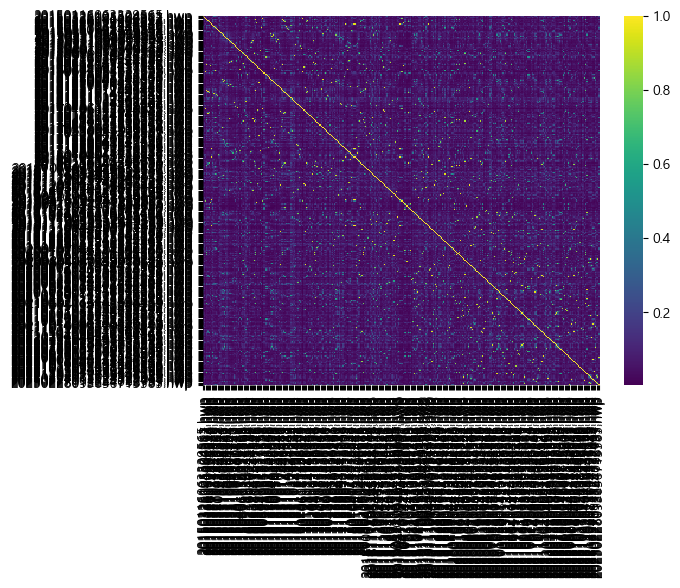

In [72]:
import seaborn as sns

sns.heatmap(similarity, xticklabels=file_name, yticklabels=file_name, cmap='viridis')
plt.show()

In [101]:
print(tfidf_df['file_name'][2])
print(tfidf_df['nouns_str'][2])
print(tfidf_df['doc_title'][2])
input = tfidf_df['nouns_str'][2]

20150325104304912.hwp
송이 시험지 모니터링 송이 실현 재배 가치 미래 산림 자원 육성 단기 임산 소득 자원 품종 발굴 육성 모니터링 버섯 재배 송이 송이 감염 시험지 Monitering Mushroom cultivation Tricholoma matsutake Matsutake pine tree Experimental site 송이 인공 재배 시험지 발생 모니터링 송이 감염 이용법 정립 농가 소득 증대 송이 감염 송이 버섯 발생 성공 재현 노력 필요 송이 발생 과거 송이 생존 확인 송이 감염 육성 식재 이중 생존 소나무 뿌리 측정 과정 건조 피해 생존 판단 기술 측면 국내 송이 생산량 규모 개발 기술 보급 지속 버섯 생산 생산량 증가 기여 송이 인공 재배 기술력 확보 송이 실연 재배지 인공 재배 교육장 활용 송이 인공 재배 기술 활용 상업 중요 근성 버섯 인공 재배 원천 기술 활용 TRM 근성 버섯 재배 기술 달성 임산물 표준 재배 지침 의거 달성 송이 시험지 모니터링 가공 재료 송이 시험지 조사 항목 습도 시험 규모 시험 분석 항목 송이 버섯 발생량 기상 관계 송이 감염 이용법 정립 가공 재료 송이 감염 조사 항목 송이 감염 이식 시험 규모 분석 항목 소나무 송이 접종 이용법 연구 공시 재료 송이 접종 조사 항목 접종 우수균주 선발 시험 규모 분석 항목 생장 Ttest 검정 송이 감염
송이 시험지 모니터링 및 송이 실현 재배


In [102]:
input

'송이 시험지 모니터링 송이 실현 재배 가치 미래 산림 자원 육성 단기 임산 소득 자원 품종 발굴 육성 모니터링 버섯 재배 송이 송이 감염 시험지 Monitering Mushroom cultivation Tricholoma matsutake Matsutake pine tree Experimental site 송이 인공 재배 시험지 발생 모니터링 송이 감염 이용법 정립 농가 소득 증대 송이 감염 송이 버섯 발생 성공 재현 노력 필요 송이 발생 과거 송이 생존 확인 송이 감염 육성 식재 이중 생존 소나무 뿌리 측정 과정 건조 피해 생존 판단 기술 측면 국내 송이 생산량 규모 개발 기술 보급 지속 버섯 생산 생산량 증가 기여 송이 인공 재배 기술력 확보 송이 실연 재배지 인공 재배 교육장 활용 송이 인공 재배 기술 활용 상업 중요 근성 버섯 인공 재배 원천 기술 활용 TRM 근성 버섯 재배 기술 달성 임산물 표준 재배 지침 의거 달성 송이 시험지 모니터링 가공 재료 송이 시험지 조사 항목 습도 시험 규모 시험 분석 항목 송이 버섯 발생량 기상 관계 송이 감염 이용법 정립 가공 재료 송이 감염 조사 항목 송이 감염 이식 시험 규모 분석 항목 소나무 송이 접종 이용법 연구 공시 재료 송이 접종 조사 항목 접종 우수균주 선발 시험 규모 분석 항목 생장 Ttest 검정 송이 감염'

In [104]:
# TfidfVectorizer = TfidfVectorizer(max_features=3000).fit(doc)
# mat_unigram = tfidf_unigram.transform(doc).toarray()

#test = tfidf_unigram.transform(['송이 시험지 모니터링 송이 실현 재배 가치 미래 산림 자원 육성 단기 임산 소득 자원 품종 발굴 육성 모니터링 버섯 재배 송이 송이 감염 시험지 Monitering Mushroom cultivation Tricholoma matsutake Matsutake pine tree Experimental site 송이 인공 재배 시험지 발생 모니터링 송이 감염 이용법 정립 농가 소득 증대 송이 감염 송이 버섯 발생 성공 재현 노력 필요 송이 발생 과거 송이 생존 확인 송이 감염 육성 식재 이중 생존 소나무 뿌리 측정 과정 건조 피해 생존 판단 기술 측면 국내 송이 생산량 규모 개발 기술 보급 지속 버섯 생산 생산량 증가 기여 송이 인공 재배 기술력 확보 송이 실연 재배지 인공 재배 교육장 활용 송이 인공 재배 기술 활용 상업 중요 근성 버섯 인공 재배 원천 기술 활용 TRM 근성 버섯 재배 기술 달성 임산물 표준 재배 지침 의거 달성 송이 시험지 모니터링 가공 재료 송이 시험지 조사 항목 습도 시험 규모 시험 분석 항목 송이 버섯 발생량 기상 관계 송이 감염 이용법 정립 가공 재료 송이 감염 조사 항목 송이 감염 이식 시험 규모 분석 항목 소나무 송이 접종 이용법 연구 공시 재료 송이 접종 조사 항목 접종 우수균주 선발 시험 규모 분석 항목 생장 Ttest 검정 송이 감염'])
test = tfidf_unigram.transform([input])
similarity = cosine_similarity(test, tfidf_matrix)
print(similarity) #[[0.42075315 0.52210862 0.3218464  0.        ]]

[[0.02318213 0.09211085 1.         0.04899078 0.02909538 0.02720019
  0.03482465 0.12733913 0.03808986 0.01860959 0.01965259 0.01036546
  0.00937169 0.11120082 0.10592378 0.04509972 0.01723735 0.02177271
  0.0153081  0.05064762 0.04276603 0.02169134 0.00791288 0.01494564
  0.01717439 0.01489823 0.01618229 0.06748197 0.02981727 0.04180137
  0.01689445 0.01246728 0.01185841 0.03385817 0.06109564 0.02658341
  0.09151324 0.01390968 0.01827602 0.02734776 0.01171699 0.01002335
  0.00874079 0.06441855 0.04757992 0.02253425 0.0166463  0.03407048
  0.00923066 0.0150466  0.98480496 0.06205499 0.06205499 0.01869038
  0.01804496 0.01709538 0.01107431 0.02250408 0.01096757 0.02106867
  0.0414214  0.033188   0.00905361 0.01685184 0.02780252 0.04537993
  0.02687167 0.05176239 0.02529913 0.0294368  0.01878856 0.01260678
  0.00917566 0.02576384 0.04623956 0.05978057 0.03006227 0.09055935
  0.01621723 0.01761345 0.0217111  0.18040516 0.0712111  0.04001403
  0.9767155  0.02122952 0.04348228 0.03877938 0.

In [105]:
len(similarity[0])


335

In [106]:
for i, sim in enumerate(similarity[0]):
    print('파일이름:' , file_name[i].rjust(30), '\t주제:', doc_title[i].ljust(50), '\t유사도:', sim.tolist())

파일이름:          20150116063329565.hwp 	주제: 저비용 목재 및 부산물 생산체계의 공정별 요소기술개발                      	유사도: 0.023182130141728215
파일이름:          20150325101504891.hwp 	주제: 산림단기소득원을 활용한 산림소득단지 조성 기술 및 관리시스템 개발               	유사도: 0.09211085252954024
파일이름:          20150325104304912.hwp 	주제: 송이 시험지 모니터링 및 송이 실현 재배                             	유사도: 1.0000000000000002
파일이름:          20150326045456367.hwp 	주제: 주요 경제수종의 천연갱신기법 및 수확작업에 관한 연구                      	유사도: 0.04899078127290511
파일이름:          20150326051040311.hwp 	주제: 주요 활엽수종 고품질 묘목 생산을 위한 양묘기술 개발                      	유사도: 0.0290953769961449
파일이름:          20150326060604094.hwp 	주제: 주요 활엽수 용재 수종의 조림기술 개발 연구                           	유사도: 0.02720019228358744
파일이름:          20150326095126547.hwp 	주제: 차량용 목조교량 현장 모니터링 연구 (국립미천골휴양림4교)                   	유사도: 0.03482465089873052
파일이름:          20150326111604520.hwp 	주제: 산림미생물 유전자원의 수집 및 증식⋅보존기술 연구                        	유사도: 0.12733913216570814
파일이름:          20150327022415436.hwp 	주제: 남부 주요 수

In [107]:
#top 1 키워드
import logging
i = similarity[0].argsort()[-1]
print('top 1 :', file_name[i], '\t', doc_title[i], '\t', '유사도 :', similarity[0][i]) #The sun is bright 0.522108621994497
logging.info(f' top 1 : {file_name[i]}  주제: {doc_title[i]} 유사도: {similarity[0][i]}')

top 1 : 20150325104304912.hwp 	 송이 시험지 모니터링 및 송이 실현 재배 	 유사도 : 1.0000000000000002


In [108]:
logging.info(f'파일이름: {tfidf_df["file_name"][i].rjust(30)} 주제: {a} 유사도: {a}')

In [109]:
# tfidf_df['file_name'][i].rjust(30)  tfidf_df['doc_title'][i].rjust(50) sim.tolist()

In [110]:

print(similarity[0].argsort()) #[3 2 0 1...] 335개 문서의 인덱스 오름차순 정렬  

[319  93  22 105 176 239 187  42 283  62 122  72 237  48 230 191  12  41
  11  89  91 267  58  56 273  40  32 309 229 140 301 241 215  31  71 324
  96 106 139 298 134 307 172 269 101 322 330 262 192  37 302 277 247 263
 198 185 193  25  23  49 197  18 303 244 158 276 245 201 256  26  78 299
 209 224 265 159  46 238  63  30 163 210  55  24  16 329  79 279 286 150
 235 178 334 165  54 117 144  38  97 290 310   9 211  53 116 268  70 300
 311 248 179 233 114 274  10 124 102 281 219 223 294 326 250 312 292 200
 332 181 177 180 280  59  85 136 157 113 257  21  80 306 254  17 313 331
 275 130 147 205 151  57  45 162 304 184   0 119 156 202 112 152  88 242
 318 325 123 100 137  68 160  73 218 141 110  35 259  66 246 288   5 222
  39 249 174 111  64 270 204 251 293 143 161   4 314 155 297  69 240 278
  28  76 145 188 203 217 272  92 194 109 169  61  33  47   6 264 133 316
 252 317 173 266 138   8 164 118 196  87 149 228 289  83 285 154 195 291
 328 131  60 232  29 182  20 108 225  86 153 115  1

In [111]:
#top10
n = 0

for i in similarity[0].argsort()[:-20:-1]:      # 반대로 출력하면 순서대로 top3 출력
    n+=1
    print('top',n,':', file_name[i], '\t', doc_title[i], '\t', '유사도 :', similarity[0][i])

top 1 : 20150325104304912.hwp 	 송이 시험지 모니터링 및 송이 실현 재배 	 유사도 : 1.0000000000000002
top 2 : 20160531061331538.hwp 	 송이 시험지 모니터링 및  송이 실현 재배 	 유사도 : 0.9848049648815121
top 3 : 20170106022303025.hwp 	 송이 시험지 모니터링 및 송이 실현 재배 	 유사도 : 0.9767155009748333
top 4 : 20190416094453188097.hwp 	 송이 및 상업적인 균근성 버섯 재배 연구 	 유사도 : 0.8265732143573359
top 5 : 20190416101146929691.hwp 	 송이 및 상업적인 균근성 버섯 재배 연구 	 유사도 : 0.7868333674572141
top 6 : 20161231125402943.hwp 	 버섯재배 자동화 시스템에 표고 용기 재배법 적용 연구 	 유사도 : 0.1804051609299983
top 7 : 20190411094048639169.hwp 	 산림미생물 유전자원의 수집 및 증식·보존기술 연구 	 유사도 : 0.16844110477542923
top 8 : 20180104053118417.hwp 	 산림미생물 유전자원의 수집 및 증식․보존기술 연구 	 유사도 : 0.16762104800274402
top 9 : 20180104061214949.hwp 	 산림미생물 유전자원의 수집 및 증식․보존기술 연구 	 유사도 : 0.16729725947656615
top 10 : 20171226072051619.hwp 	 산림미생물 유전자원의 수집 및 증식·보존기술 연구 	 유사도 : 0.16389391103565012
top 11 : 20171226074036648.hwp 	 버섯재배 자동화 시스템에 표고 용기 재배법 적용 연구 	 유사도 : 0.1616399001013068
top 12 : 20191110034705197381.hwp 	 산림미생물 유전자원의 

In [82]:
for i in similarity[0].argsort()[:-11:-1]:      # 반대로 출력하면 순서대로 top3 출력
    print(file_name[i],doc_title[i], similarity[0][i])

20150325104304912.hwp 송이 시험지 모니터링 및 송이 실현 재배 0.38403461217801443
20160531061331538.hwp 송이 시험지 모니터링 및  송이 실현 재배 0.35483871382113247
20190416101146929691.hwp 송이 및 상업적인 균근성 버섯 재배 연구 0.30632398307615966
20190416094453188097.hwp 송이 및 상업적인 균근성 버섯 재배 연구 0.29252321524386643
20170106022303025.hwp 송이 시험지 모니터링 및 송이 실현 재배 0.28626284646522815
20161231125402943.hwp 버섯재배 자동화 시스템에 표고 용기 재배법 적용 연구 0.17177651396284743
20171226074036648.hwp 버섯재배 자동화 시스템에 표고 용기 재배법 적용 연구 0.16146140127634015
20181116094436727618.hwp 버섯재배 자동화 시스템에 표고 용기 재배법 적용 연구 0.15182824512101406
20191110025511446899.hwp 버섯재배 자동화 시스템에 표고 용기 재배법 적용 연구 0.14836517519022482
20221018042354106003.hwp 표고 톱밥배지 재배기간 단축기술 개발 0.13610342424943403


In [83]:
similarity

array([[0.03059528, 0.09700518, 0.38403461, 0.08146852, 0.03729015,
        0.01290099, 0.04843603, 0.10848966, 0.04810507, 0.02425053,
        0.02547737, 0.01326699, 0.00867796, 0.09731395, 0.11571771,
        0.0644422 , 0.0316078 , 0.03065293, 0.0173578 , 0.05778224,
        0.04927778, 0.01891657, 0.00588759, 0.01566677, 0.02557028,
        0.01575593, 0.0147787 , 0.06356174, 0.0343851 , 0.06890172,
        0.0120939 , 0.0128371 , 0.02656488, 0.03664829, 0.06418851,
        0.02597134, 0.12733684, 0.01093653, 0.0163142 , 0.0342304 ,
        0.01962913, 0.01820287, 0.00962965, 0.06691109, 0.08036241,
        0.02870681, 0.023688  , 0.02739413, 0.01110244, 0.02147607,
        0.35483871, 0.08431302, 0.08431302, 0.01795026, 0.02197431,
        0.016004  , 0.0132961 , 0.03652252, 0.00689545, 0.03132807,
        0.03781114, 0.04477775, 0.01064566, 0.0130292 , 0.03022976,
        0.03920896, 0.02821489, 0.08587603, 0.03430089, 0.01906491,
        0.02777626, 0.01669203, 0.00990064, 0.03

In [84]:
tfidf_df['Top_Keywords_unigram'][i][:30]

['배지',
 '버섯',
 '종균',
 '톱밥',
 '배양',
 '표고',
 '재배',
 '접종',
 '품종',
 '단축',
 '기간',
 '특성',
 '갈변',
 '조건',
 '액체',
 '학회지',
 '표고버섯',
 '융기',
 '생산량',
 '나발',
 '중량',
 '발생',
 '한국',
 '경도',
 '형성',
 '가배',
 '양특',
 '이율',
 '차수',
 '속도']

In [85]:
# 유사도 높은 문서부터 내림차순 정렬
import numpy as np
sorted_indices = np.argsort(cs_mat, axis=1)[:,::-1]
sorted_values = np.take_along_axis(cs_mat, sorted_indices, axis=1)

sorted_indices, sorted_values

NameError: name 'cs_mat' is not defined

In [ ]:
# 원하는 문서 번호 지정
select_index = 2
df_subset = df.iloc[select_index-1:select_index]

# 해당 문서의 문서명 출력
doc_name_value = df.loc[select_index - 1, 'doc_name']
print(f'문서 이름 : {doc_name_value}')

# 해당 문서의 파일명 출력
file_name_value = df.loc[select_index - 1, 'file_name']
print(f'파일 이름 : {file_name_value}')

# 해당 문서의 분류명 출력
file_type_value = df.loc[select_index - 1, 'type']
print(f'문서 종류 : {file_type_value}')

# 해당 문서의 텍스트 출력
file_text_value = df.loc[select_index - 1, 'text'][:2000]
print('--------------------------------------------------------------------------')
print(f'문서 내용 : {file_text_value}')

In [ ]:
# 유사 문서의 실제 내용을 pdf 이미지로 출력하는 함수

import os
import fitz
import numpy as np
from PIL import Image, ImageDraw

pdf_lake_dir = '../../../lake/ensol/processed/'

# PDF의 특정 페이지를 display
def display_pdf_page_by_filename(pdf_directory, filename, page_number, width=None, height=None):

    pdf_path = os.path.join(pdf_directory, filename)
    
    if os.path.isfile(pdf_path):
        try:
            extract_and_display_page(pdf_path, page_number, width, height)
            
        except ValueError:
            print(f"Page {page_number} not found in the PDF.")
    else:
        print(f"PDF file for {filename} not found.")
        
def extract_and_display_page(pdf_path, page_number, width=None, height=None, border_color='red', border_width=3):

    pdf_document = fitz.open(pdf_path)


    page = pdf_document.load_page(page_number-1)

    pixmap = page.get_pixmap()

    image_np = np.frombuffer(pixmap.samples, dtype=np.uint8).reshape(pixmap.height, pixmap.width, 3)

    image = Image.fromarray(image_np)

    if width and height:
        image = image.resize((width, height))
        
    #     # 테두리 그리기
    # if border_color and border_width > 0:
    #     draw = ImageDraw.Draw(image)
    #     draw.rectangle([(border_width, border_width), (image.width - border_width, image.height - border_width)], outline=border_color, width=border_width)

    display(image)

    pdf_document.close()

In [ ]:
from pprint import pprint
import re
import json
import os

# 검색할 문서 번호 지정
queried_index = int(input("원본 문서 번호: "))
# 하나의 행을 Dataframe 형태로 반환 (워드클라우드 출력에 필요)
df_subset = df.iloc[queried_index-1:queried_index]
# 문서의 벡터 가져와서 선언
vector = sample_df.iloc[queried_index-1]['TFIDF']

# # Opensearch로 유사 문서 검색
# similar_doc = eos.search_similar_documents(index_name, vector, vector_dimension, size=10)

# # 유사 문서 검색 결과에서 필요한 값만 가져오기
# extracted_data = []
# for hit in similar_doc['hits']['hits']:
#     score_data = hit['_score']
#     lake_data = hit['_source']['lake']
#     origin_data = hit['_source']['origin']
#     extracted_info = {
#         'id' : lake_data['id'],
#         'file_name' : lake_data['name'],
#         'doc_name' : origin_data['name'],
#         'path' : lake_data['path'],
#         #'category' : lake_data['category'],
#         'score' : score_data
#     }
#     extracted_data.append(extracted_info)

#==================================================================================================

# 유사 문서 지정
top_10_doc_indices = sorted_indices[queried_index-1][1:21]
top_10_doc_values = sorted_values[queried_index-1][1:21]

#===================================================================================================

# 검색된 문서의 분류명
file_type_value = sample_df.loc[queried_index - 1, 'label']

# 검색된 문서의 정보 출력
print('')
print('검색된 파일: ', sample_df.file_name[queried_index-1])
print('검색된 문서명: ', sample_df.doc_name[queried_index-1])
print('검색된 문서의 분류명: ', file_type_value)
# if sample_df.file_name[queried_index-1].split('.')[1] == 'xls' or w2v_df.file_name[queried_index-1].split('.')[1] == 'xlsx':
#     pprint(re.sub(r'\n', '', sample_df.text[queried_index-1][410:630]))
# else:
#     filename = sample_df.file_name[queried_index-1].split('.')[0] + '.pdf'
#     pdf_dir1 = sample_df.file_name[queried_index-1][3:5]
#     pdf_dir2 = sample_df.file_name[queried_index-1][1:3]
#     pdf_directory = os.path.join(pdf_lake_dir, pdf_dir1, pdf_dir2)
#     display_pdf_page_by_filename(pdf_directory, filename, 1)

#===================================================================================================
for idx, i in enumerate(top_10_doc_indices):
    print('='*150)
    print('top ', idx+1)
    print('')
    print('파일명: ', sample_df.file_name[i])
    filename = sample_df.file_name[i].split('.')[0] + '.pdf'
    pdf_dir1 = sample_df.file_name[i][3:5]
    pdf_dir2 = sample_df.file_name[i][1:3]
    print('문서명: ', sample_df.doc_name[i])
    print('분류: ', sample_df.label[i])
    print(f'유사도: {top_10_doc_values[idx]:.3f}')
    pdf_directory = os.path.join(pdf_lake_dir, pdf_dir1, pdf_dir2)
    display_pdf_page_by_filename(pdf_directory, filename, 1)
    print('')
    pprint(re.sub(r'\n', '',sample_df.text[i][410:630]))
    print('='*100)

In [ ]:
# test

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import math

In [ ]:
documents = np.array([
    "The sky is blue",
    "The sun is bright",
    "The sun in the sky is bright",
    "We can see the shining sun, the bright sun"
])


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

In [ ]:
print(tfidf_matrix.toarray())

In [ ]:
print(tfidf_matrix[0:1].toarray())

In [ ]:
similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)

In [ ]:
print(similarity)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(similarity)
sns.heatmap(similarity, xticklabels=documents, yticklabels=documents, cmap='viridis')
plt.show()


In [ ]:

test = tfidf_vectorizer.transform(['this is test'])
similarity = cosine_similarity(test, tfidf_matrix)
print(similarity) #[[0.42075315 0.52210862 0.3218464  0.        ]]

In [ ]:

for i, sim in enumerate(similarity[0]):
    print(documents[i], sim)

In [ ]:

#top 1
i = similarity[0].argsort()[-1]
print(documents[i], similarity[0][i]) #The sun is bright 0.522108621994497

In [ ]:
#top 3
print(similarity[0].argsort()) #[3 2 0 1]
for i in similarity[0].argsort()[:-4:-1]:
    print(documents[i], similarity[0][i])
'''
The sun is bright 0.522108621994497
The sky is blue 0.4207531516446357
The sun in the sky is bright 0.3218463987598218
'''